In [1]:
import numpy as np
import pandas as pd
import pegasus as pg

In [2]:
sample_dict = {'Sample': ['02-P248880-S026-R01', '02-P240970-S036-R01', '02-P334354-S027-R01', '02-P348762-S026-R01', '04-P006354-S023-R01', '04-P054921-S064-R01', '04-P079042-S047-R01', '04-P103142-S049-R01', '12-P485759-S016-R01', '12-P617758-S006-R01', '12-P890292-S006-R01', '13-P999991-S001-R01', '13-P999992-S001-R01', '13-P999994-S001-R01', '13-P999996-S001-R01', '13-P999997-S001-R01'], 
               'Location': ['covid_kidney/02-P248880-S026-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/02-P240970-S036-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/02-P334354-S027-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/02-P348762-S026-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/04-P006354-S023-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/04-P054921-S064-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/04-P079042-S047-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/04-P103142-S049-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/12-P485759-S016-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/12-P617758-S006-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/12-P890292-S006-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/13-P999991-S001-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/13-P999992-S001-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/13-P999994-S001-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/13-P999996-S001-R01_out_FPR_0.01_filtered.h5', 'covid_kidney/13-P999997-S001-R01_out_FPR_0.01_filtered.h5'],
               'Method': ['nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei', 'nuclei']
              }

In [3]:
data = pg.aggregate_matrices(sample_dict, attributes = ['Method'], default_ref = 'GRCh38:GRCh38premrna')

2021-01-28 12:28:05,789 - pegasusio.readwrite - INFO - 10x file 'covid_kidney/02-P240970-S036-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 12:28:05,789 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.32s.
2021-01-28 12:28:06,031 - pegasusio.readwrite - INFO - 10x file 'covid_kidney/02-P248880-S026-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 12:28:06,031 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.24s.
2021-01-28 12:28:06,104 - pegasusio.qc_utils - INFO - After filtration, 8216 out of 8216 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 12:28:06,163 - pegasusio.multimodal_data - INFO - After filtration, 8216 out of 8216 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 12:28:06,338 - pegasusio.readwrite - INFO - 10x file 'covid_kidney/02-P334354-S027-R01_out_FPR_0.01_filtered.h5' is loaded.
2021-01-28 12:28:06,339 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.16

2021-01-28 12:28:11,014 - pegasusio.qc_utils - INFO - After filtration, 4014 out of 4014 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 12:28:11,067 - pegasusio.multimodal_data - INFO - After filtration, 4014 out of 4014 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 12:28:11,994 - pegasusio.aggr_data - INFO - Function 'aggregate' finished in 0.92s.
2021-01-28 12:28:12,244 - pegasusio.data_aggregation - INFO - Aggregated 16 files.
2021-01-28 12:28:12,246 - pegasusio.data_aggregation - INFO - Function 'aggregate_matrices' finished in 6.78s.


In [4]:
pg.qc_metrics(data, min_genes = 200, max_genes = 6000, min_umis = 400, max_umis = 600000, mito_prefix = 'MT-', percent_mito = 20)
pg.filter_data(data)
pg.identify_robust_genes(data)
pg.log_norm(data)
pg.highly_variable_features(data, consider_batch=True)
pg.pca(data, robust=True)
pca_key = pg.run_harmony(data)
pg.neighbors(data, rep=pca_key)
pg.louvain(data, rep=pca_key)
pg.umap(data, rep=pca_key)

2021-01-28 12:28:23,959 - pegasusio.qc_utils - INFO - After filtration, 33724 out of 78141 cell barcodes are kept in UnimodalData object GRCh38premrna-rna.
2021-01-28 12:28:24,027 - pegasusio.multimodal_data - INFO - After filtration, 33724 out of 78141 cell barcodes are kept in UnimodalData object SARSCoV2-rna.
2021-01-28 12:28:24,028 - pegasus.tools.preprocessing - INFO - Function 'filter_data' finished in 0.28s.
2021-01-28 12:28:24,704 - pegasus.tools.preprocessing - INFO - After filtration, 30191/33538 genes are kept. Among 30191 genes, 24140 genes are robust.
2021-01-28 12:28:24,705 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 0.68s.
2021-01-28 12:28:25,251 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.55s.
2021-01-28 12:28:25,532 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.28s.
2021-01-28 12:28:25,580 - pegasus.tools.hvf_selection - INFO - 2000 highly variable feature

/Users/bl621/Documents/software/miniconda3/envs/pegasus/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
Reach convergence after 3 iteration(s).
2021-01-28 12:28:48,300 - pegasus.tools.batch_correction - INFO - Function 'run_harmony' finished in 16.11s.
2021-01-28 12:28:52,990 - pegasus.tools.nearest_neighbors - INFO - Function 'get_neighbors' finished in 4.69s.
2021-01-28 12:28:54,027 - pegasus.tools.nearest_neighbors - INFO - Function 'calculate_affinity_matrix' finished in 1.04s.
2021-01-28 12:28:55,251 - pegasus.tools.graph_operations - INFO - Function 'construct_graph' finished in 1.22s.
2021-01-28 12:29:11,148 - pegasus.tools.clustering - INFO - Louvain clustering is done. Get 16 clusters.
2021-01-28 12:29:11,286 - pegasus.tools.clustering - INFO - Function 'louvain' finished in 17.26s.
2021-01-28 12:29:11,287 - pegasus.tools.nearest_neighbors - INFO - Found cached kNN results, no calculation is required.
2021-01-28 12:29:11,287 - pegasus.tools.nearest_neighb

Exclude 04-P054921-S064-R01 and 04-P079042-S047-R01, which contained only 3 and 5 cells respectively.

2021-01-28 12:29:32,156 - pegasus.tools.preprocessing - INFO - After filtration, 24744/30191 genes are kept. Among 24744 genes, 23118 genes are robust.
2021-01-28 12:29:32,157 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 0.14s.
2021-01-28 12:29:32,209 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.05s.
2021-01-28 12:29:32,224 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.01s.
2021-01-28 12:29:32,265 - pegasus.tools.hvf_selection - INFO - 2000 highly variable features have been selected.
2021-01-28 12:29:32,266 - pegasus.tools.hvf_selection - INFO - Function 'highly_variable_features' finished in 0.06s.
2021-01-28 12:29:34,000 - pegasus.tools.doublet_detection - INFO - Sample 02-P240970-S036-R01: doublet threshold = 0.0613; total cells = 3987; neotypic doublet rate = 6.17%
2021-01-28 12:29:34,400 - pegasus.tools.doublet_detection - INFO - Function '_run_scrublet' finished in 2.

2021-01-28 12:29:54,632 - pegasus.tools.doublet_detection - INFO - Sample 12-P890292-S006-R01: doublet threshold = 0.1925; total cells = 7294; neotypic doublet rate = 1.82%
2021-01-28 12:29:54,957 - pegasus.tools.doublet_detection - INFO - Function '_run_scrublet' finished in 3.55s.
2021-01-28 12:29:55,877 - pegasus.tools.preprocessing - INFO - After filtration, 18218/30191 genes are kept. Among 18218 genes, 18218 genes are robust.
2021-01-28 12:29:55,877 - pegasus.tools.preprocessing - INFO - Function 'identify_robust_genes' finished in 0.20s.
2021-01-28 12:29:55,888 - pegasus.tools.preprocessing - INFO - Function 'log_norm' finished in 0.01s.
2021-01-28 12:29:55,892 - pegasus.tools.hvf_selection - INFO - Function 'estimate_feature_statistics' finished in 0.00s.
2021-01-28 12:29:55,945 - pegasus.tools.hvf_selection - INFO - 2000 highly variable features have been selected.
2021-01-28 12:29:55,946 - pegasus.tools.hvf_selection - INFO - Function 'highly_variable_features' finished in 0.

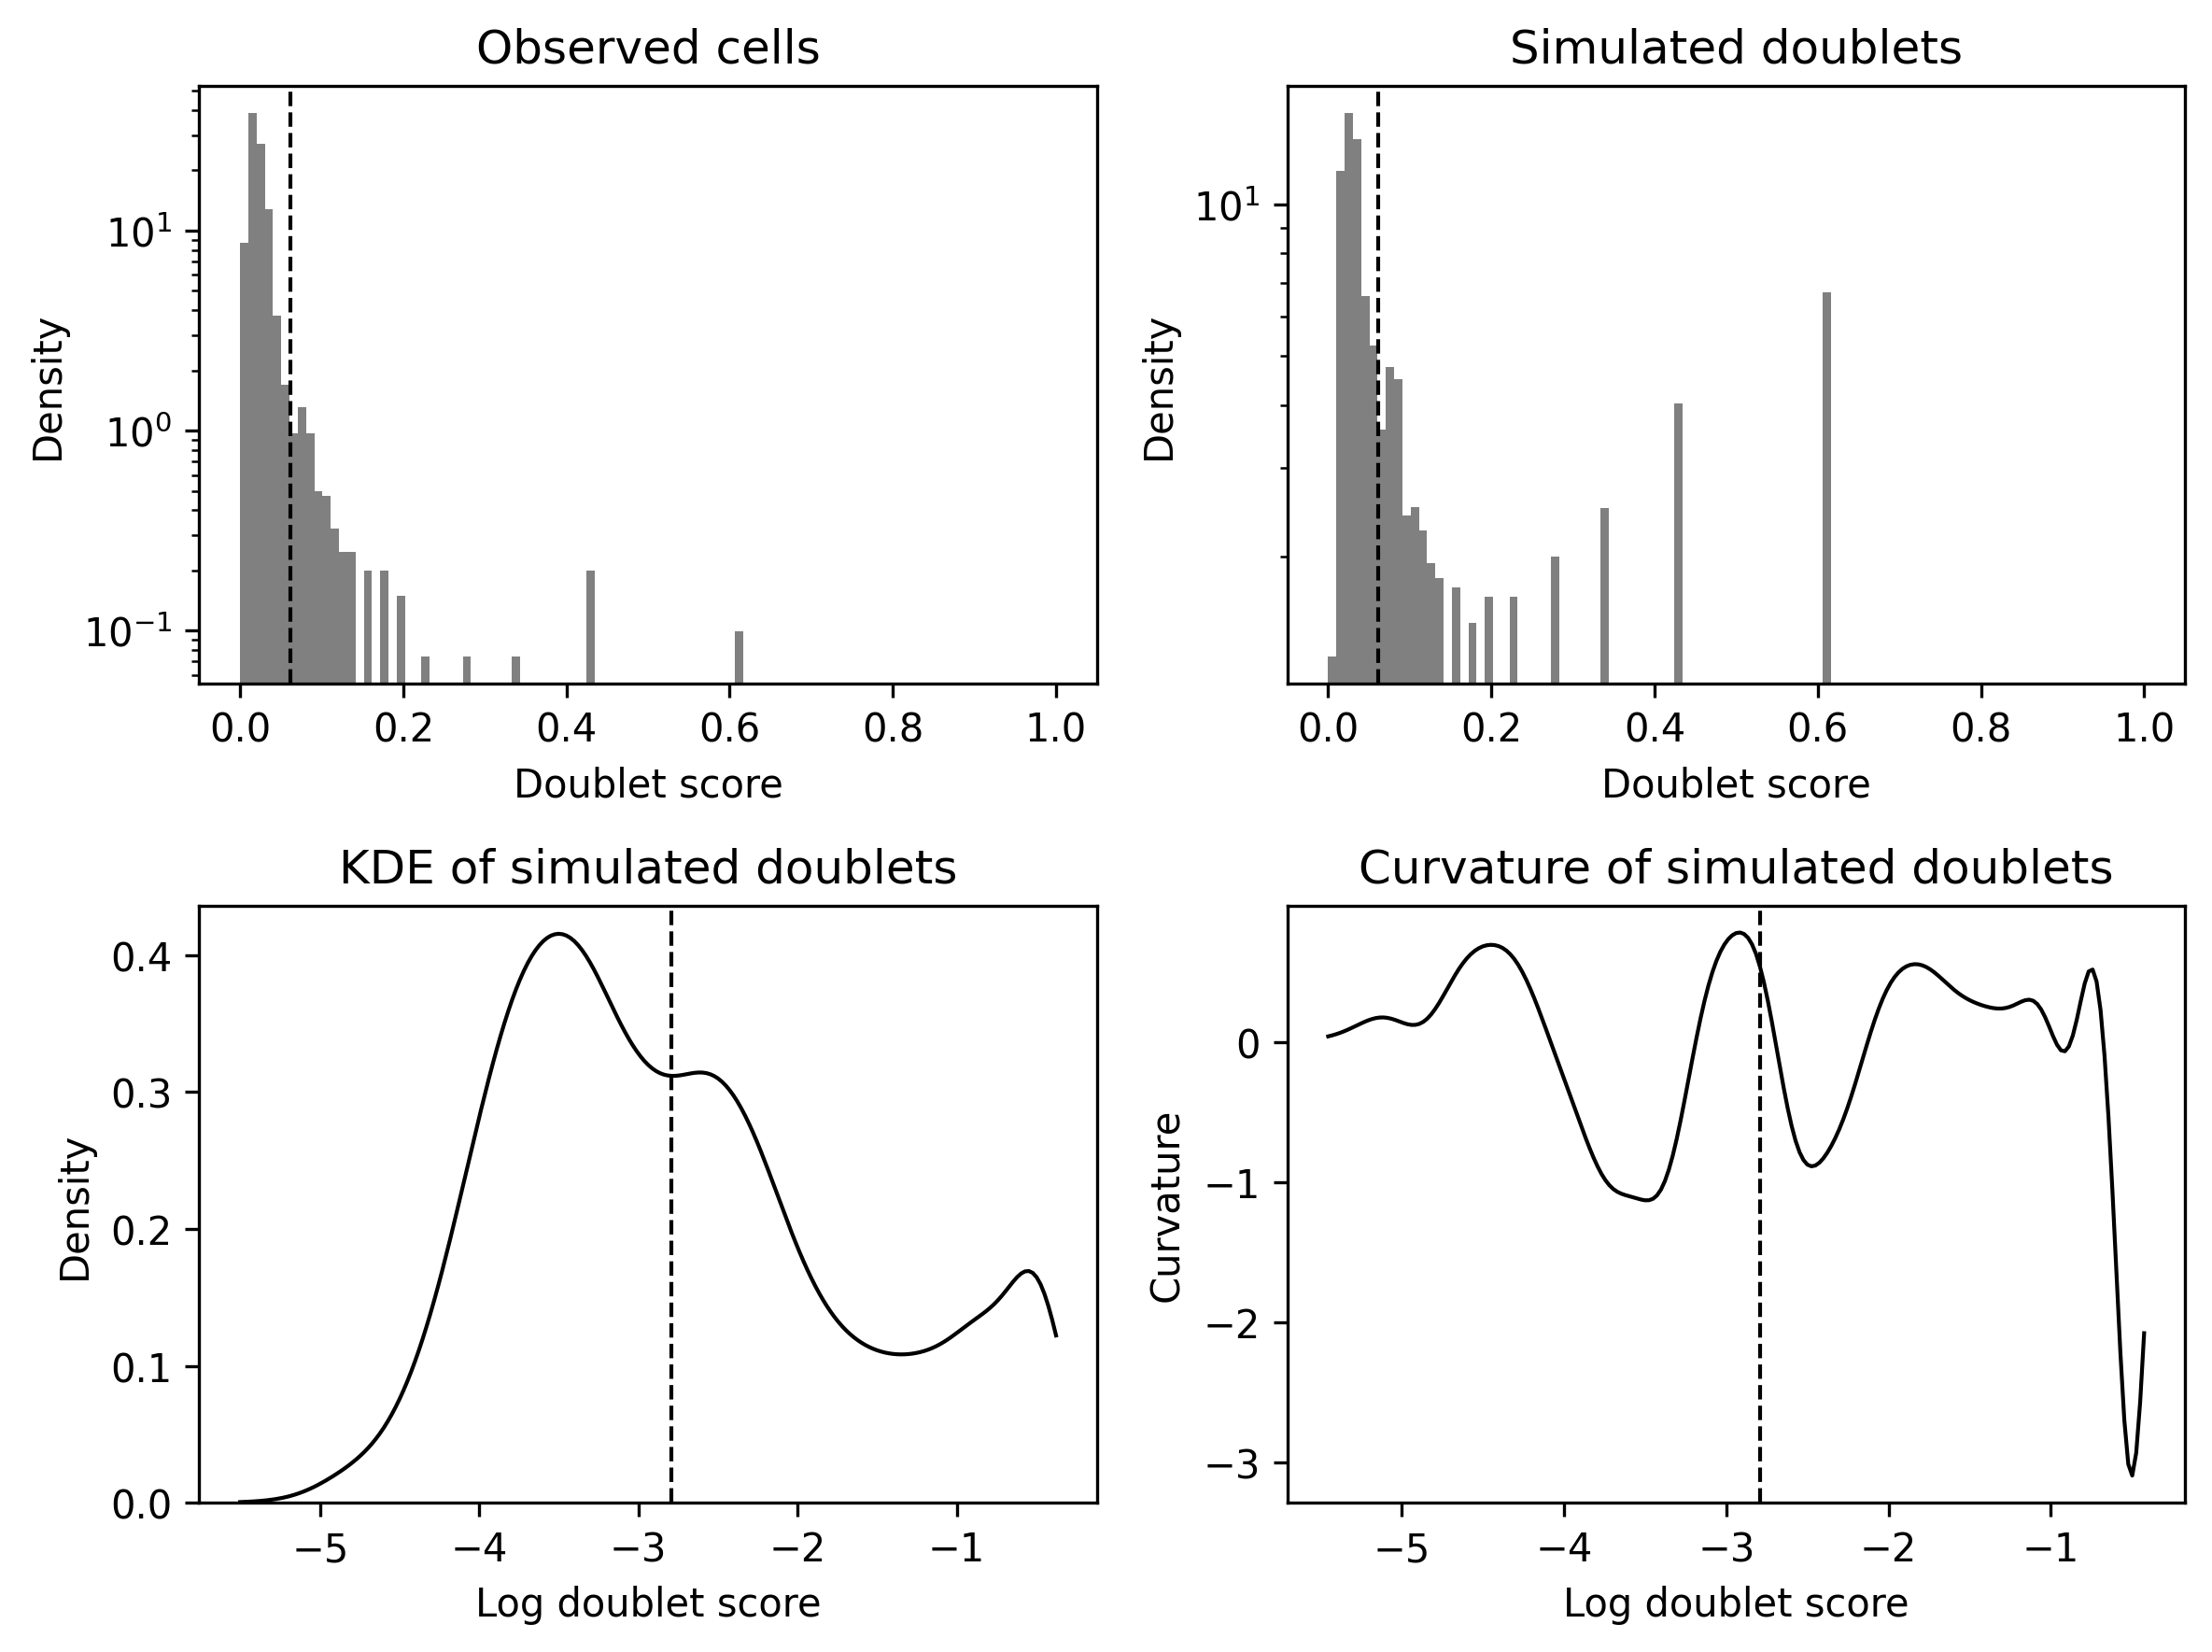

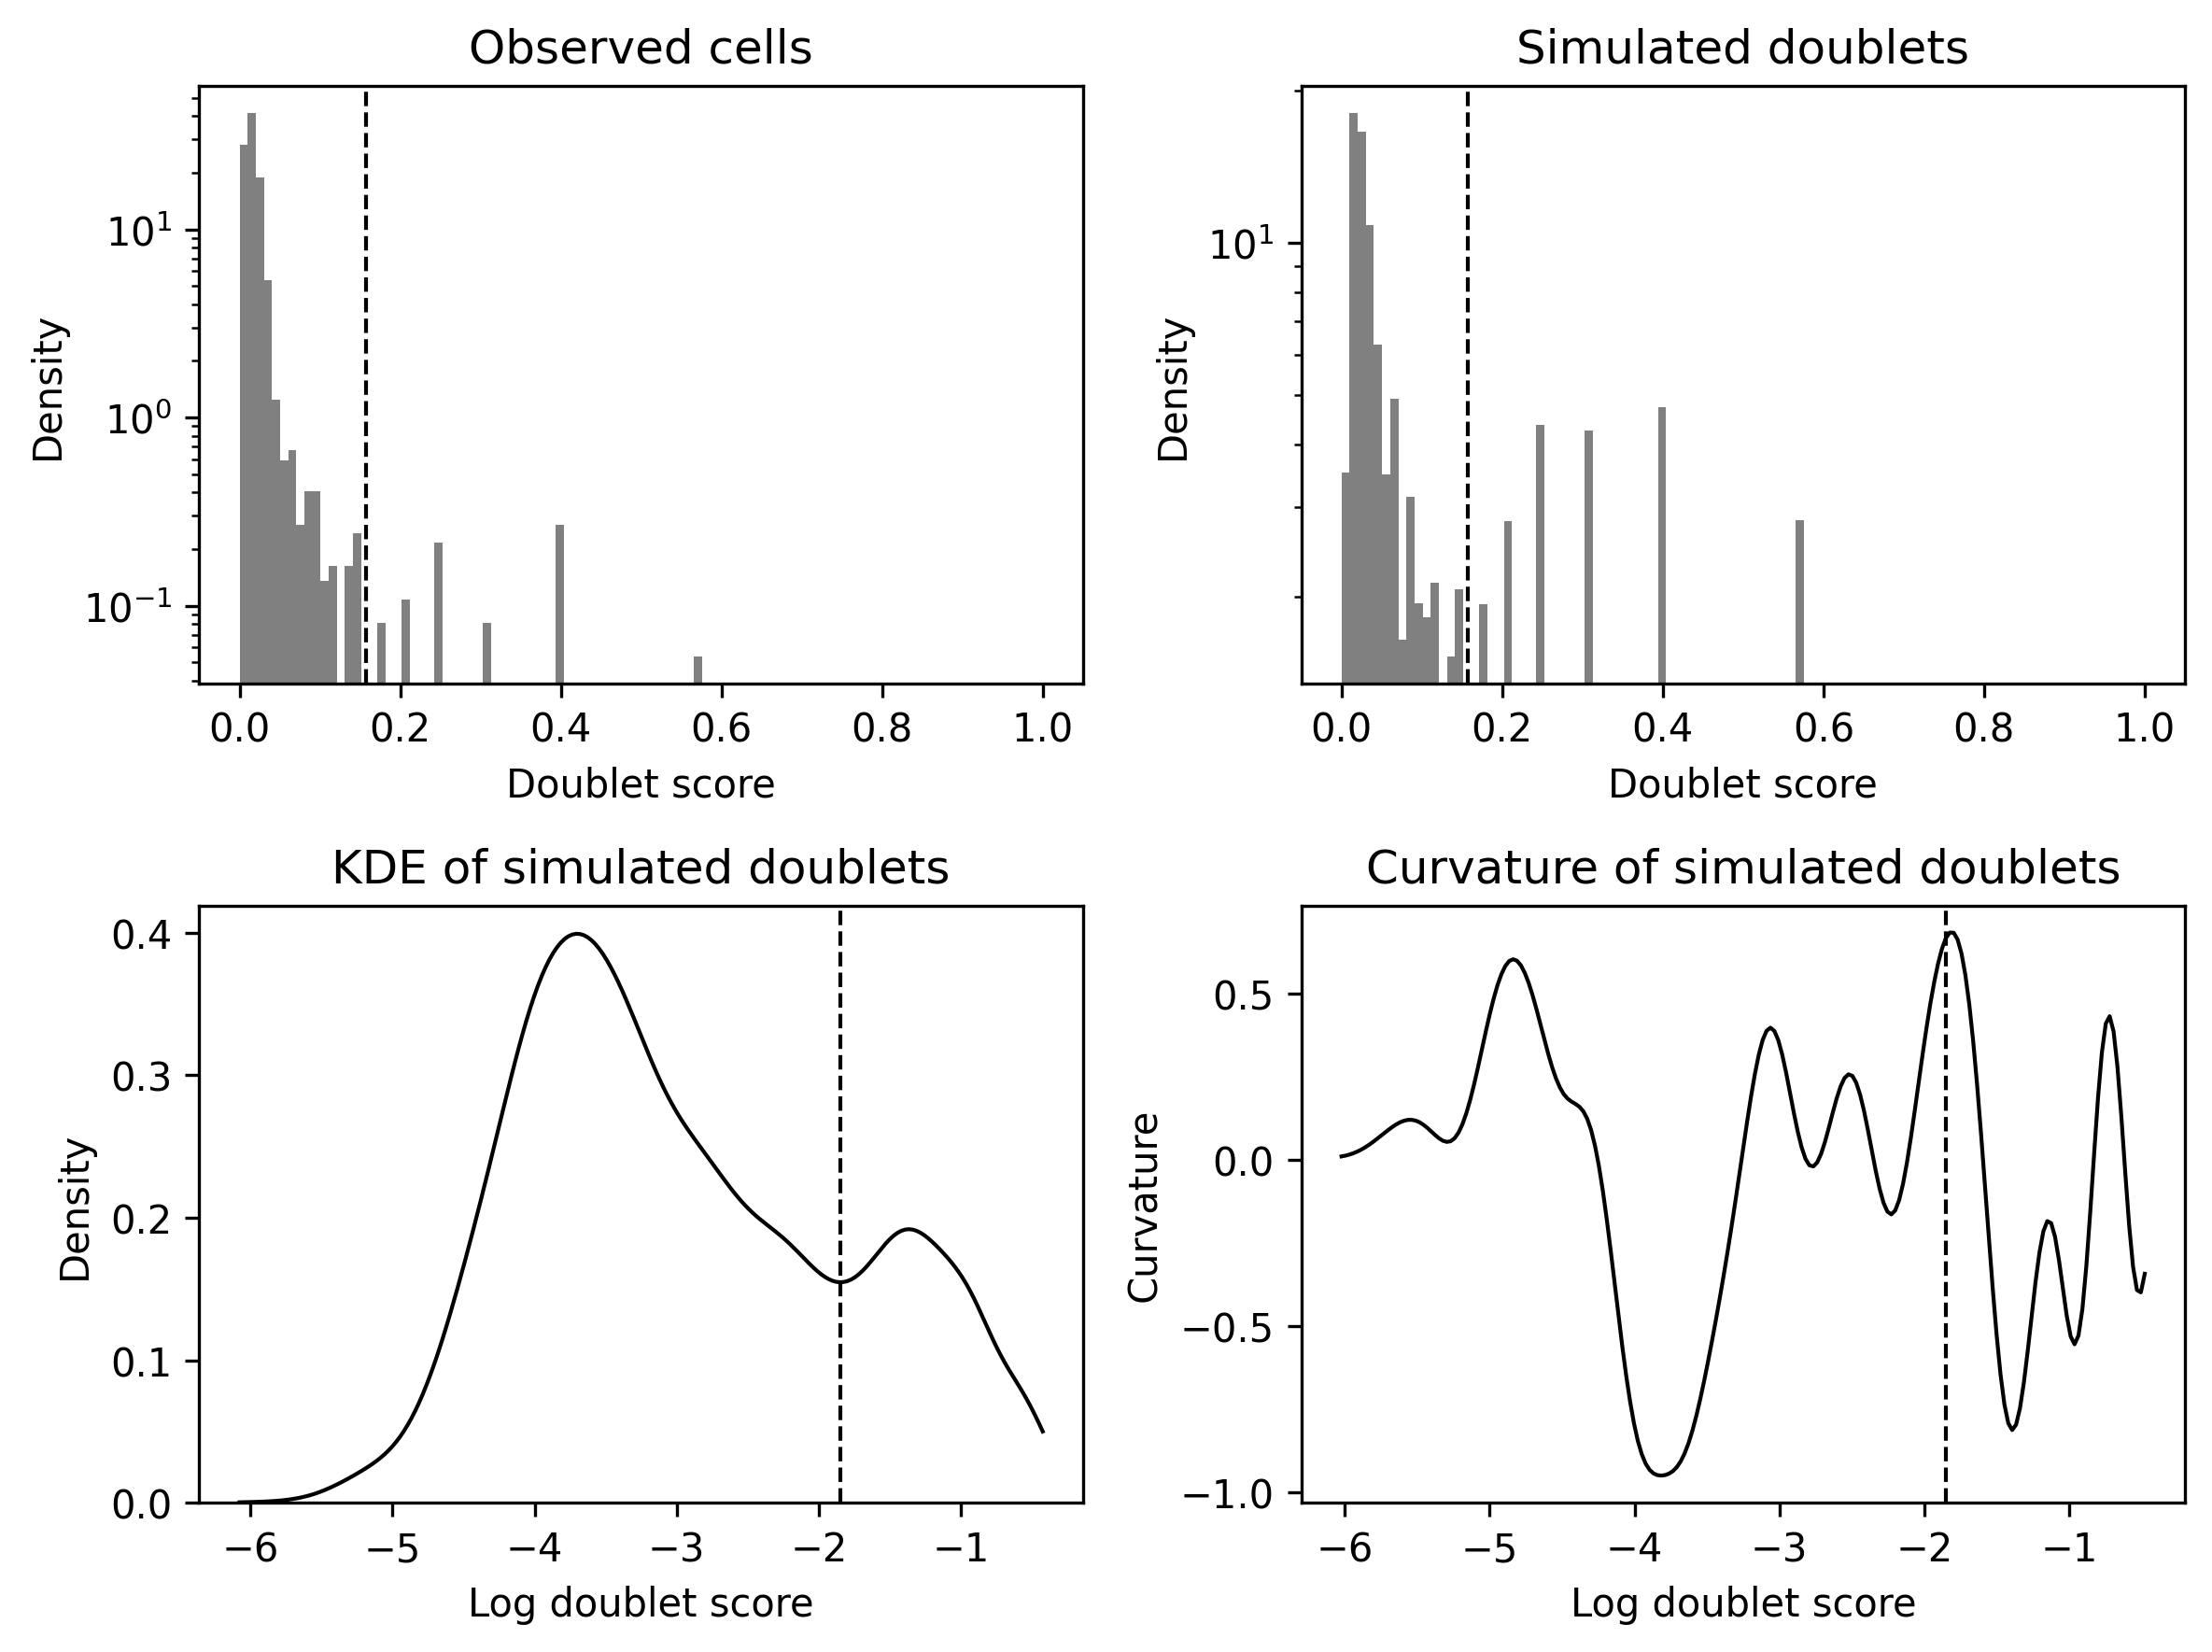

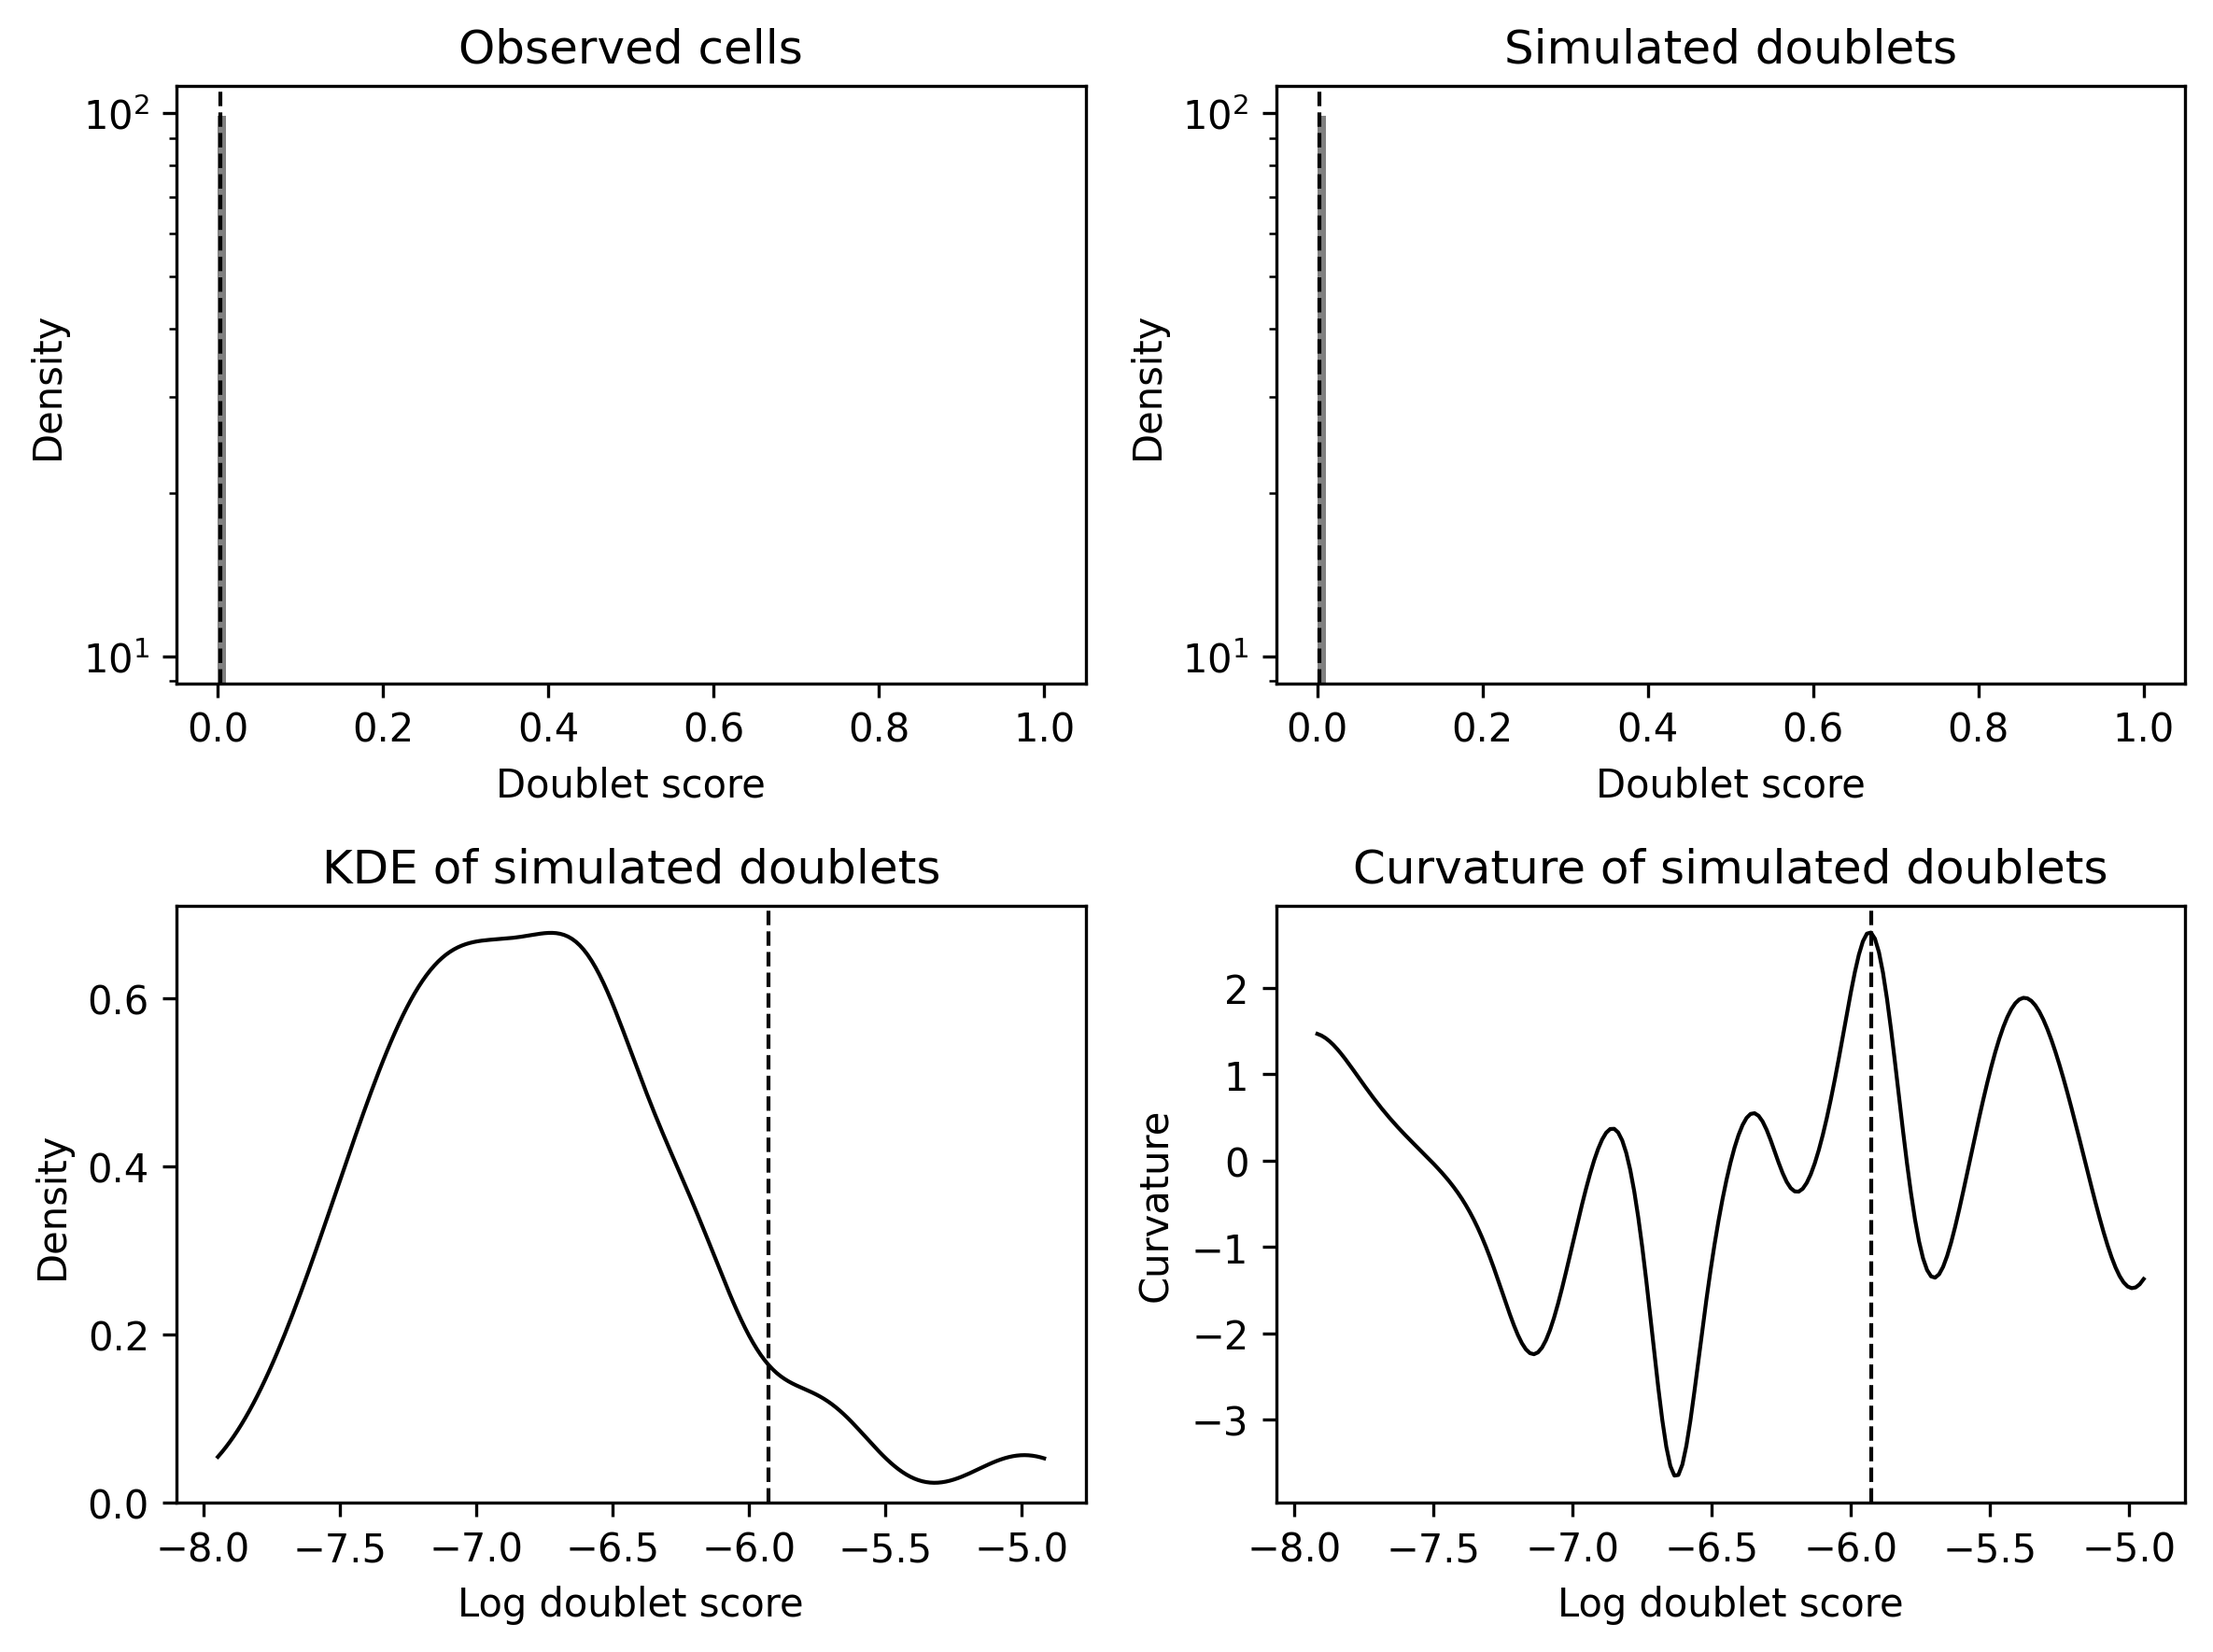

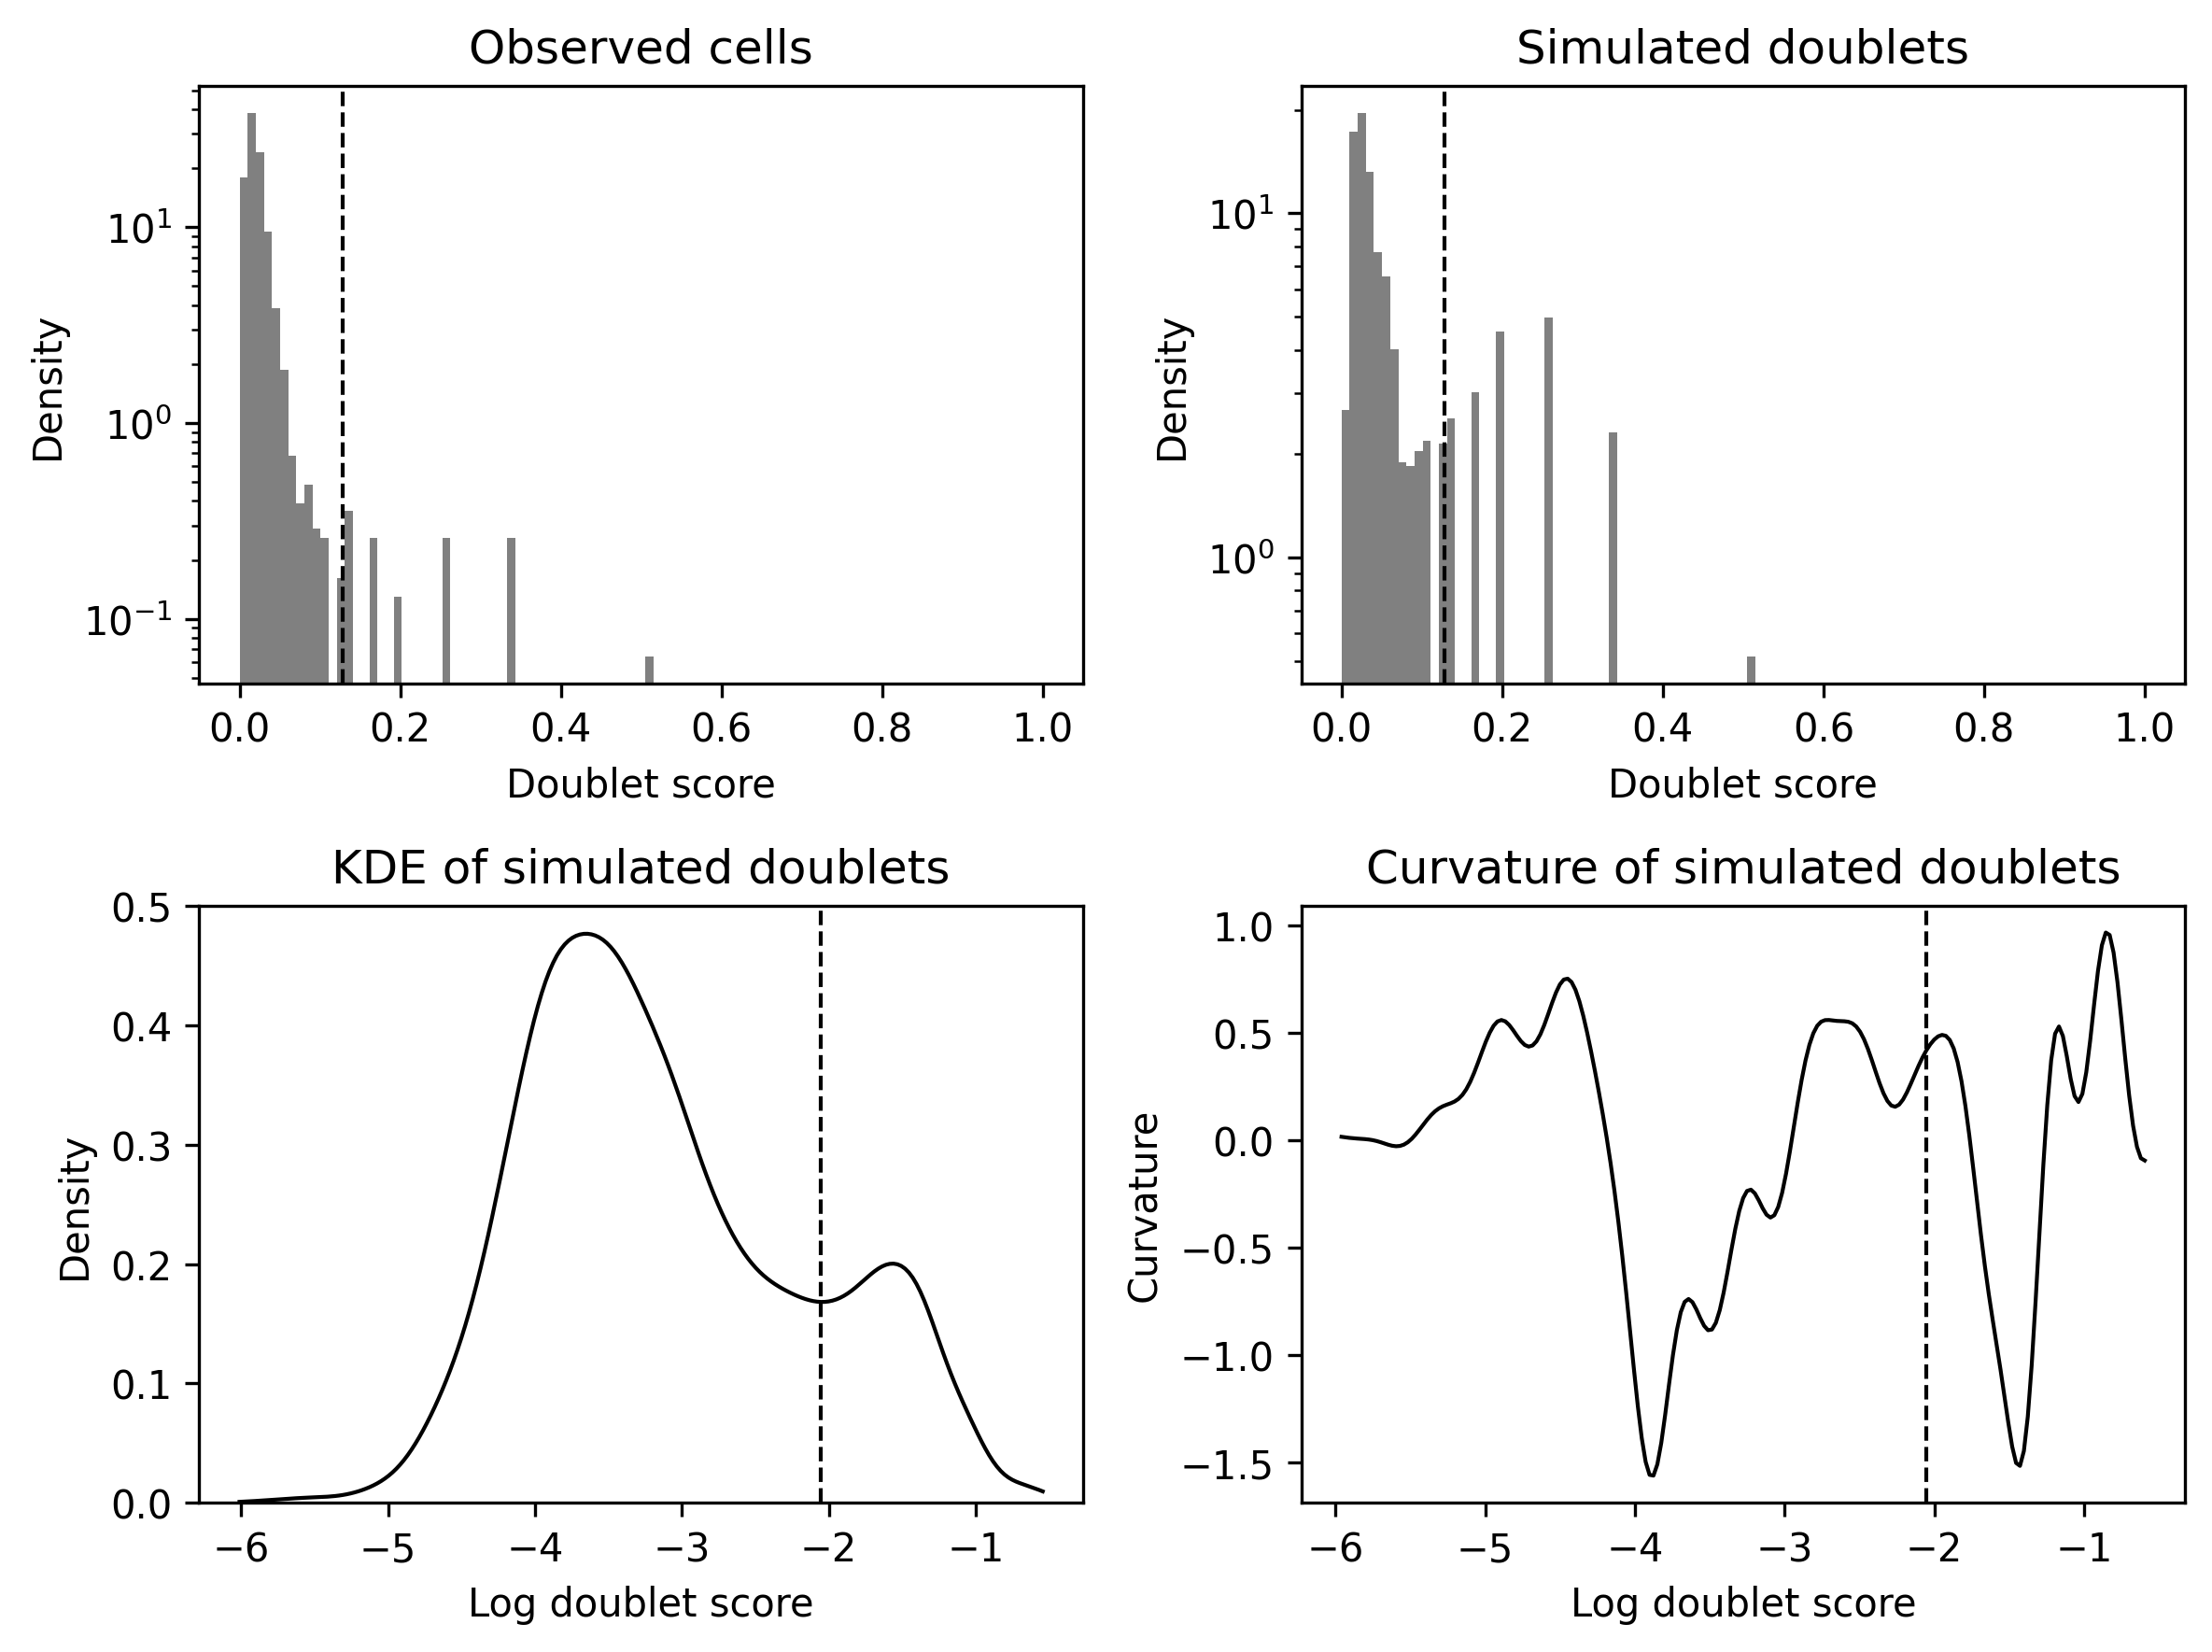

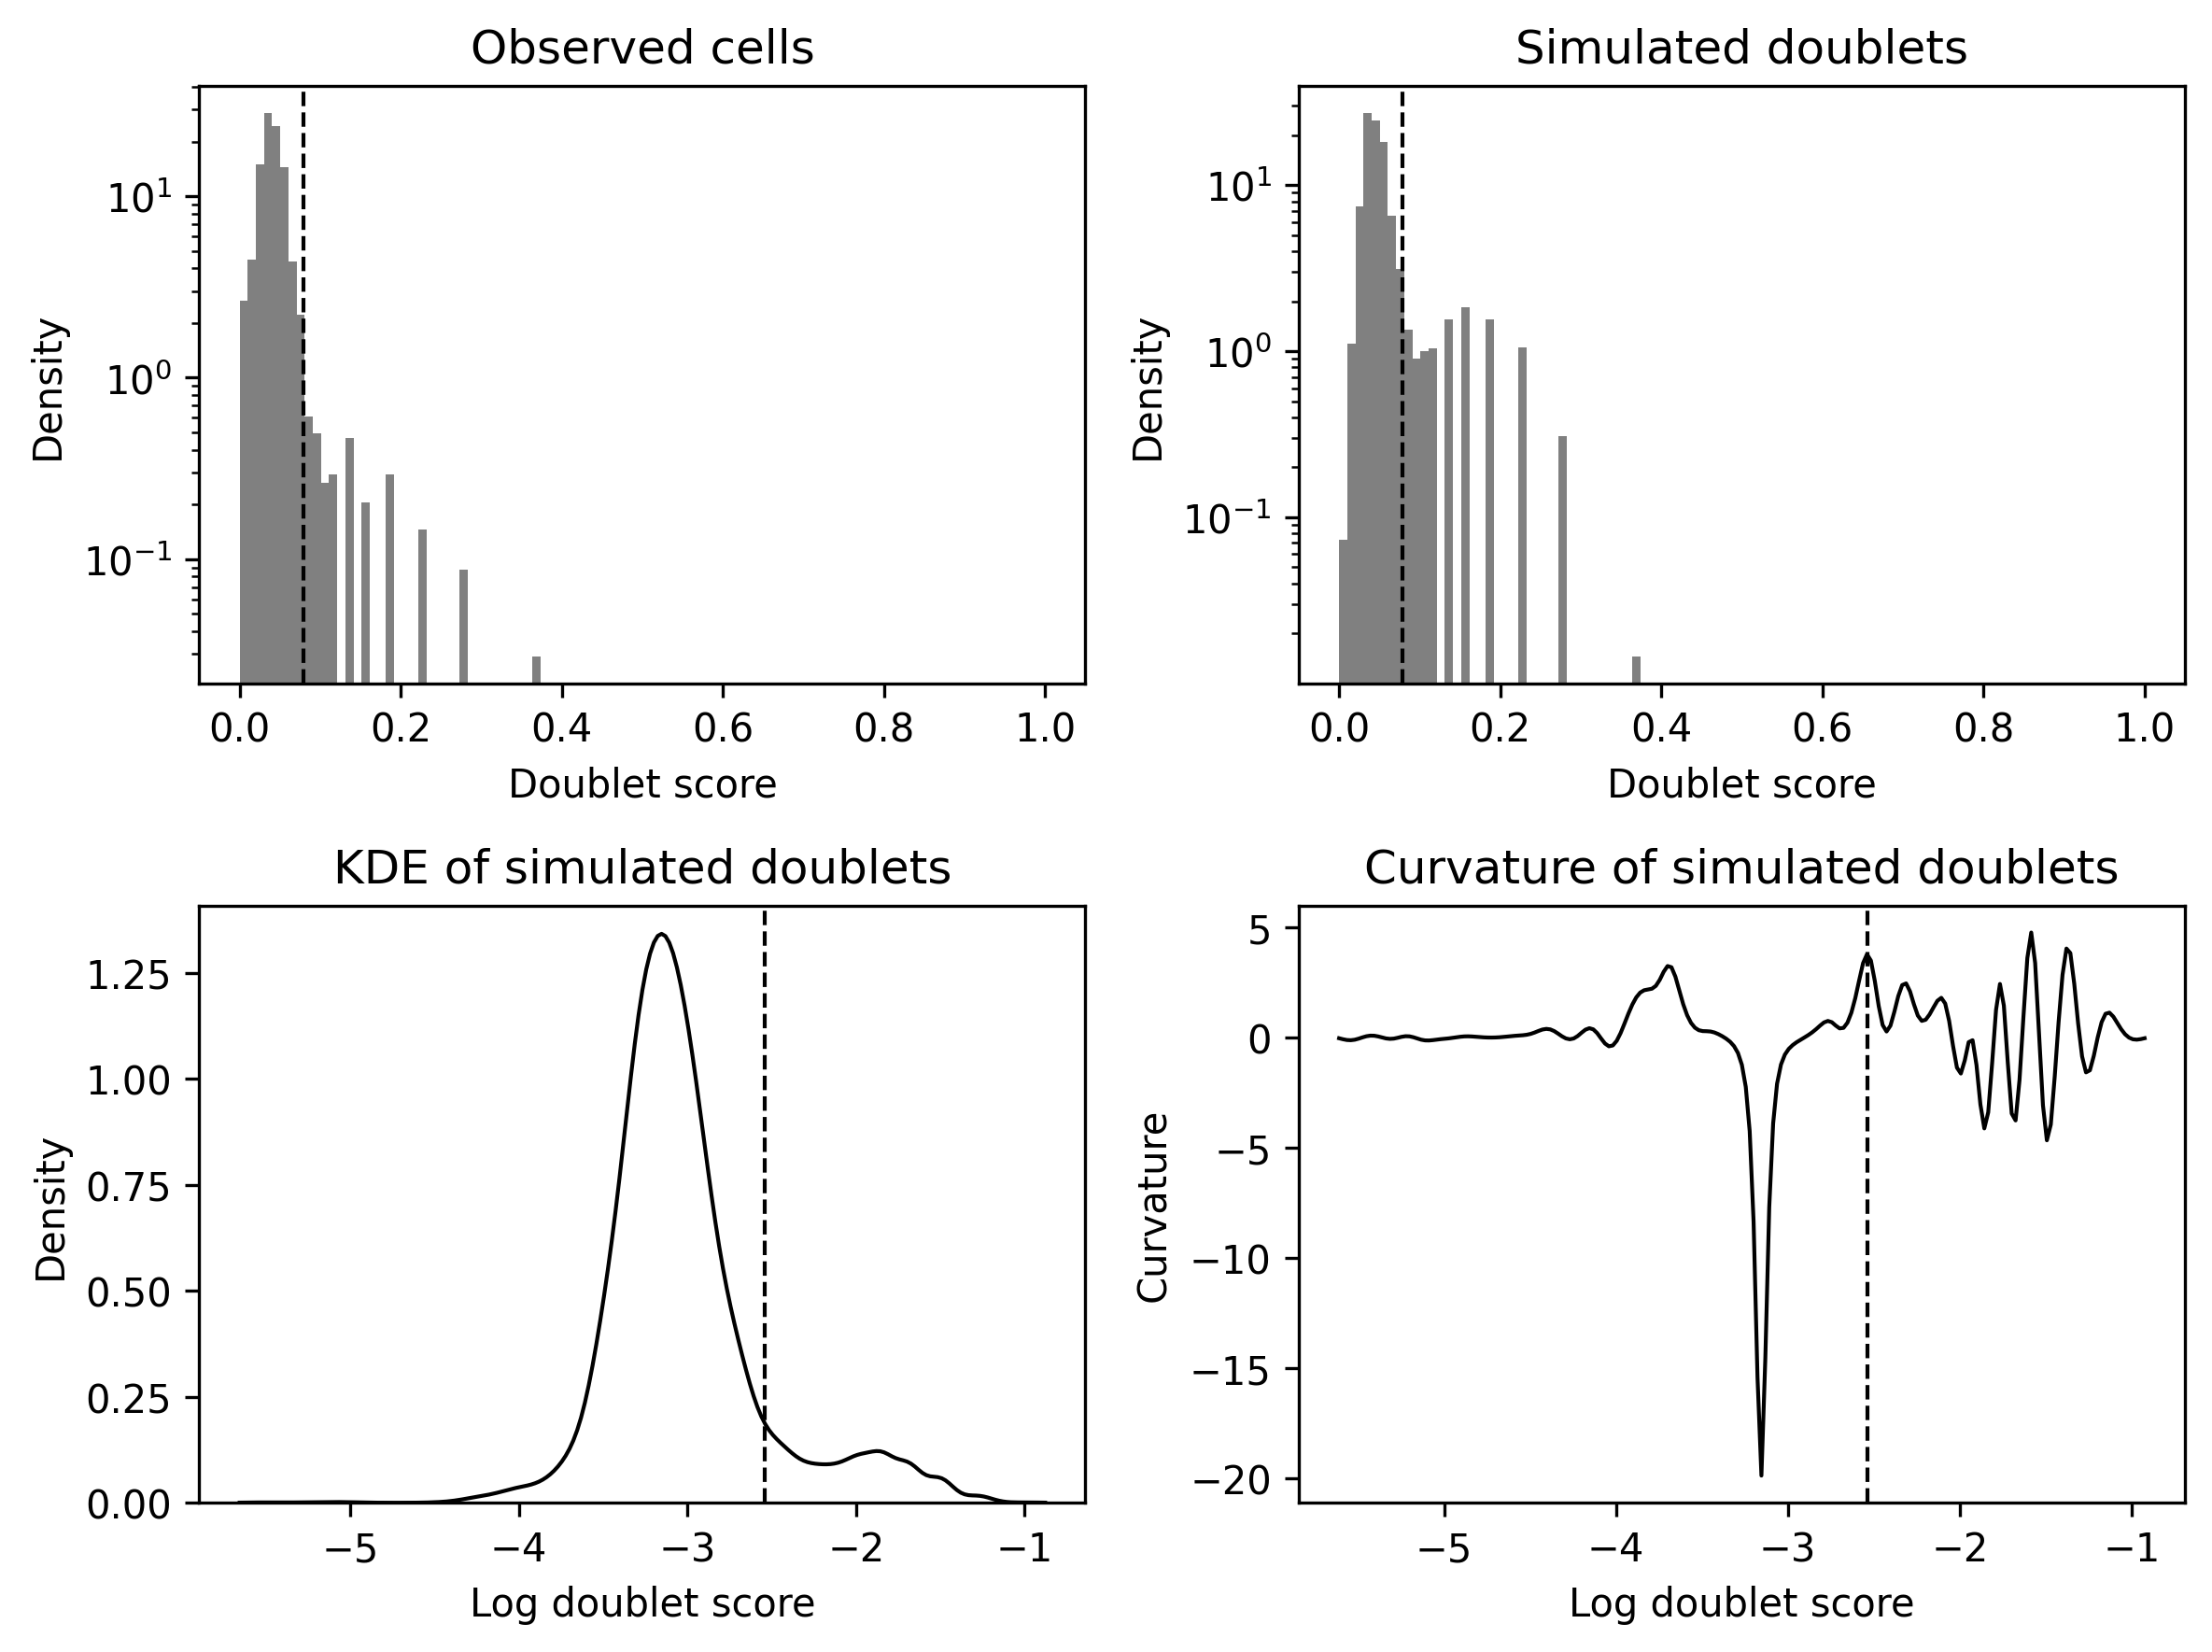

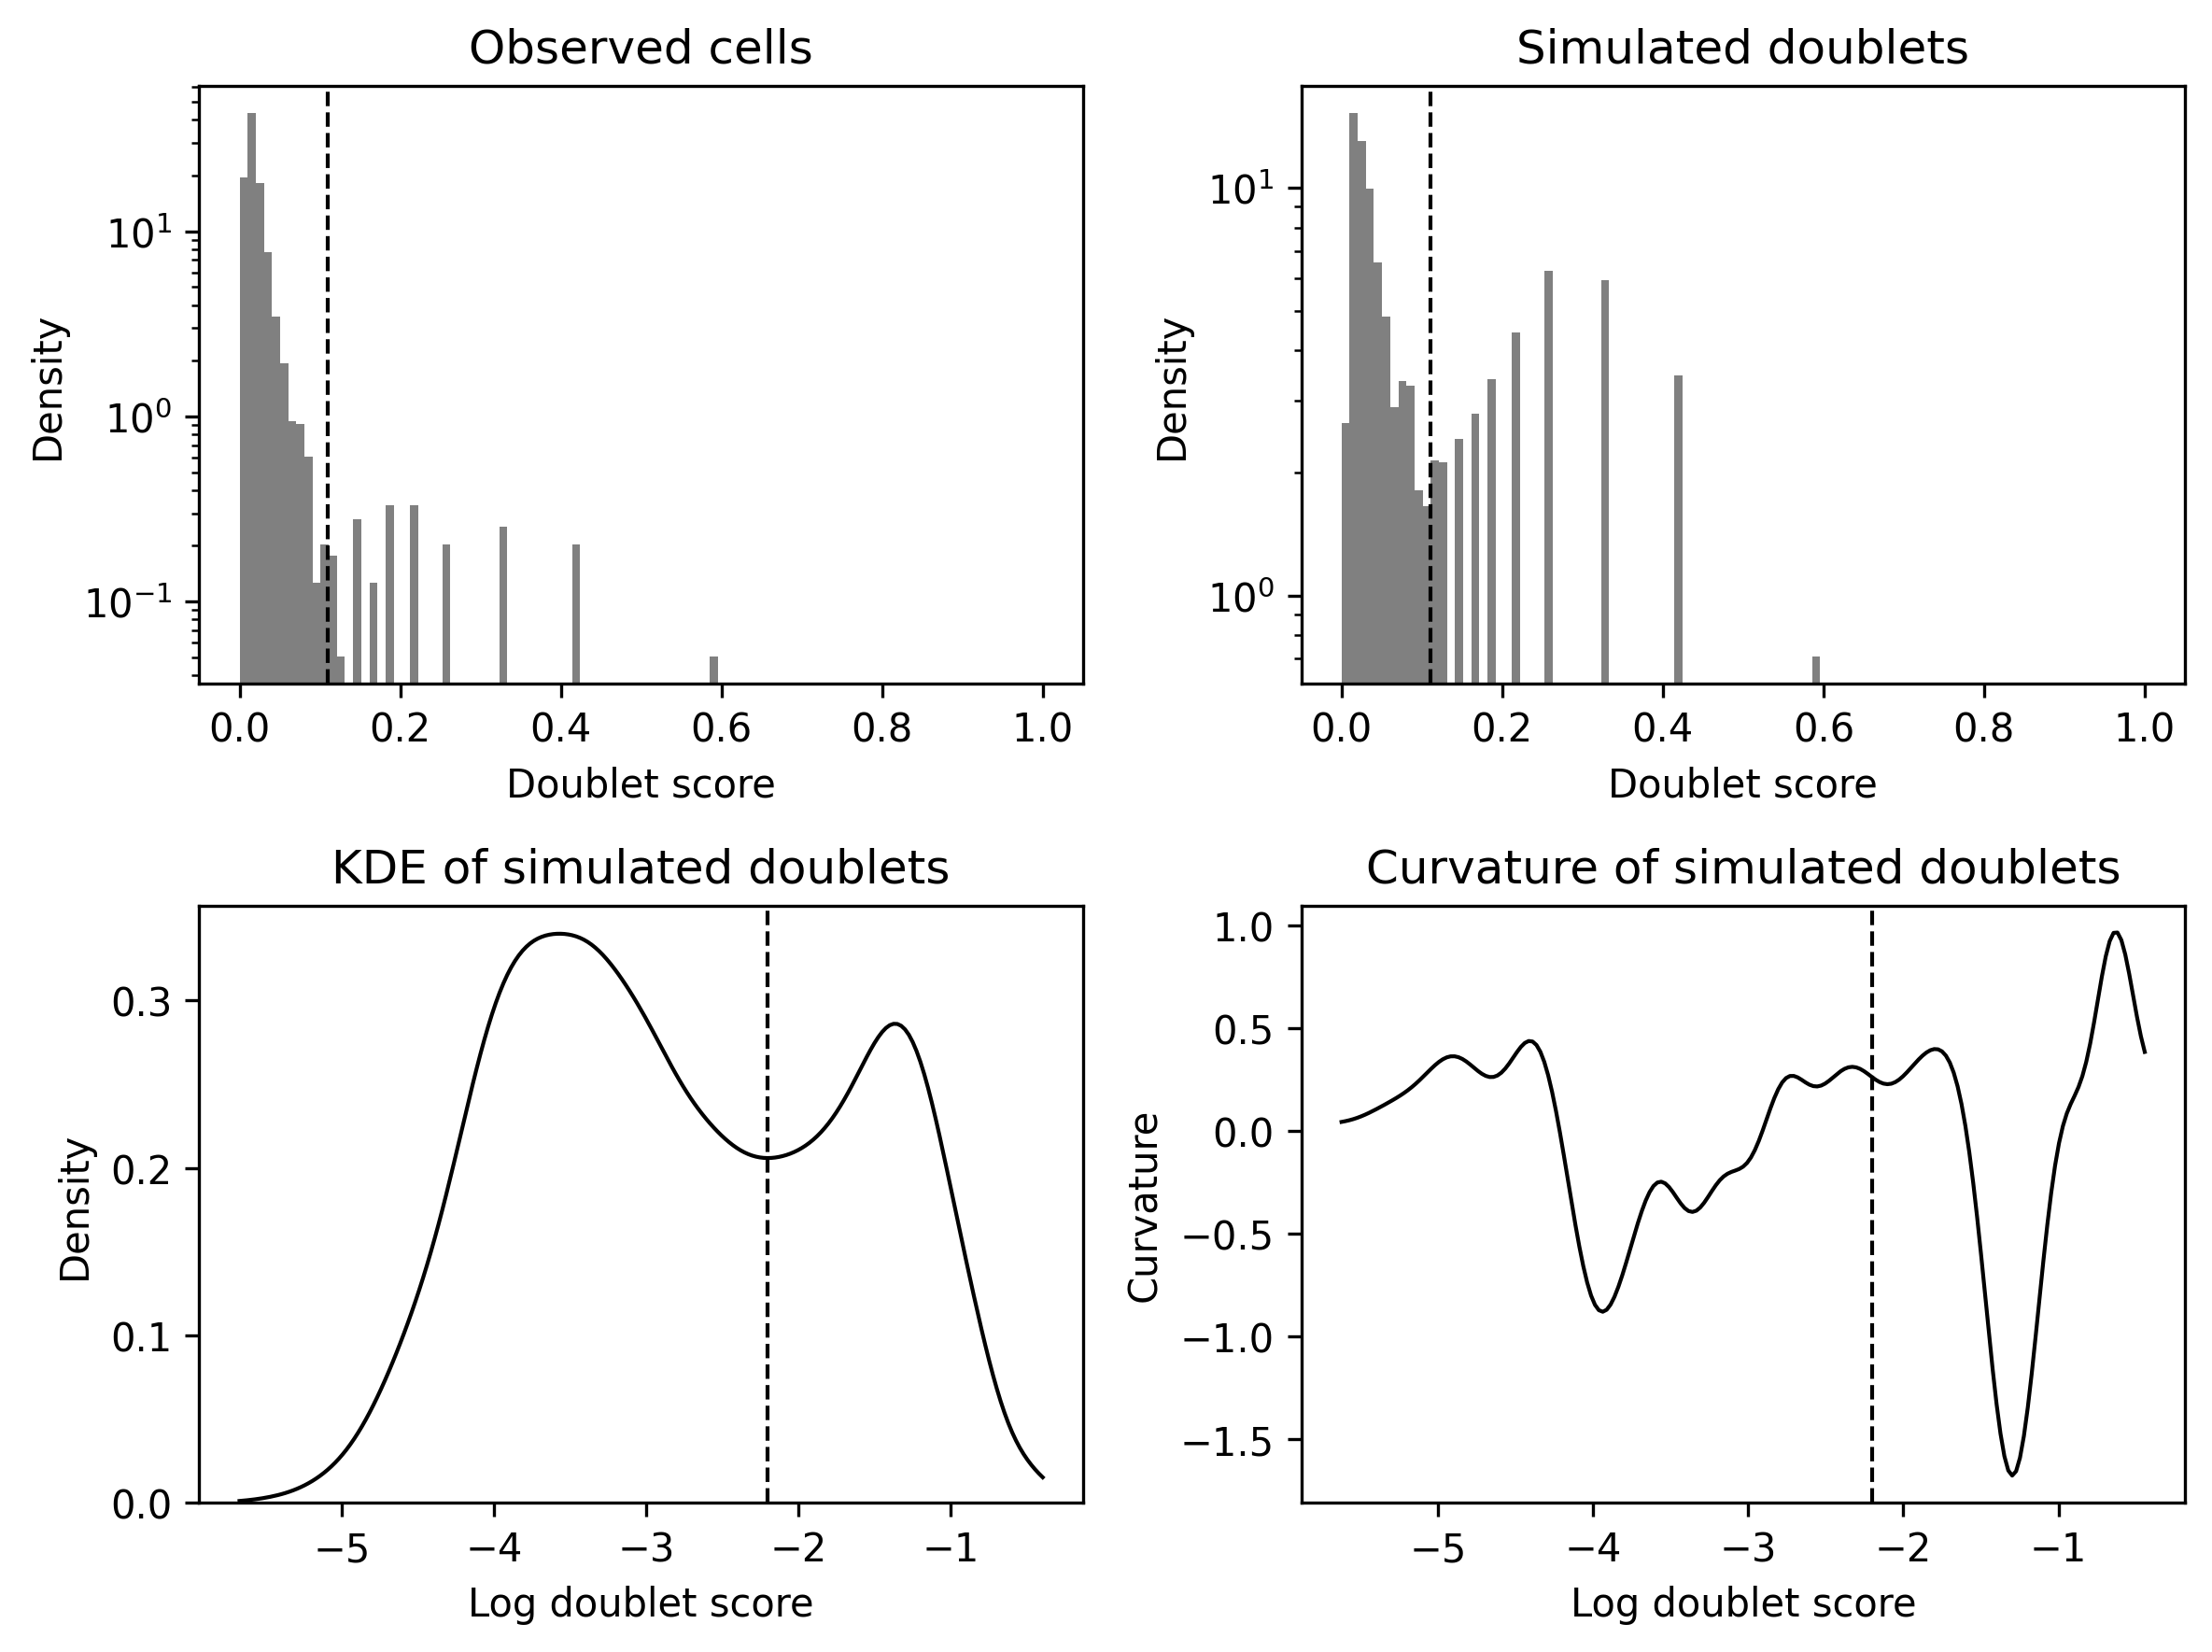

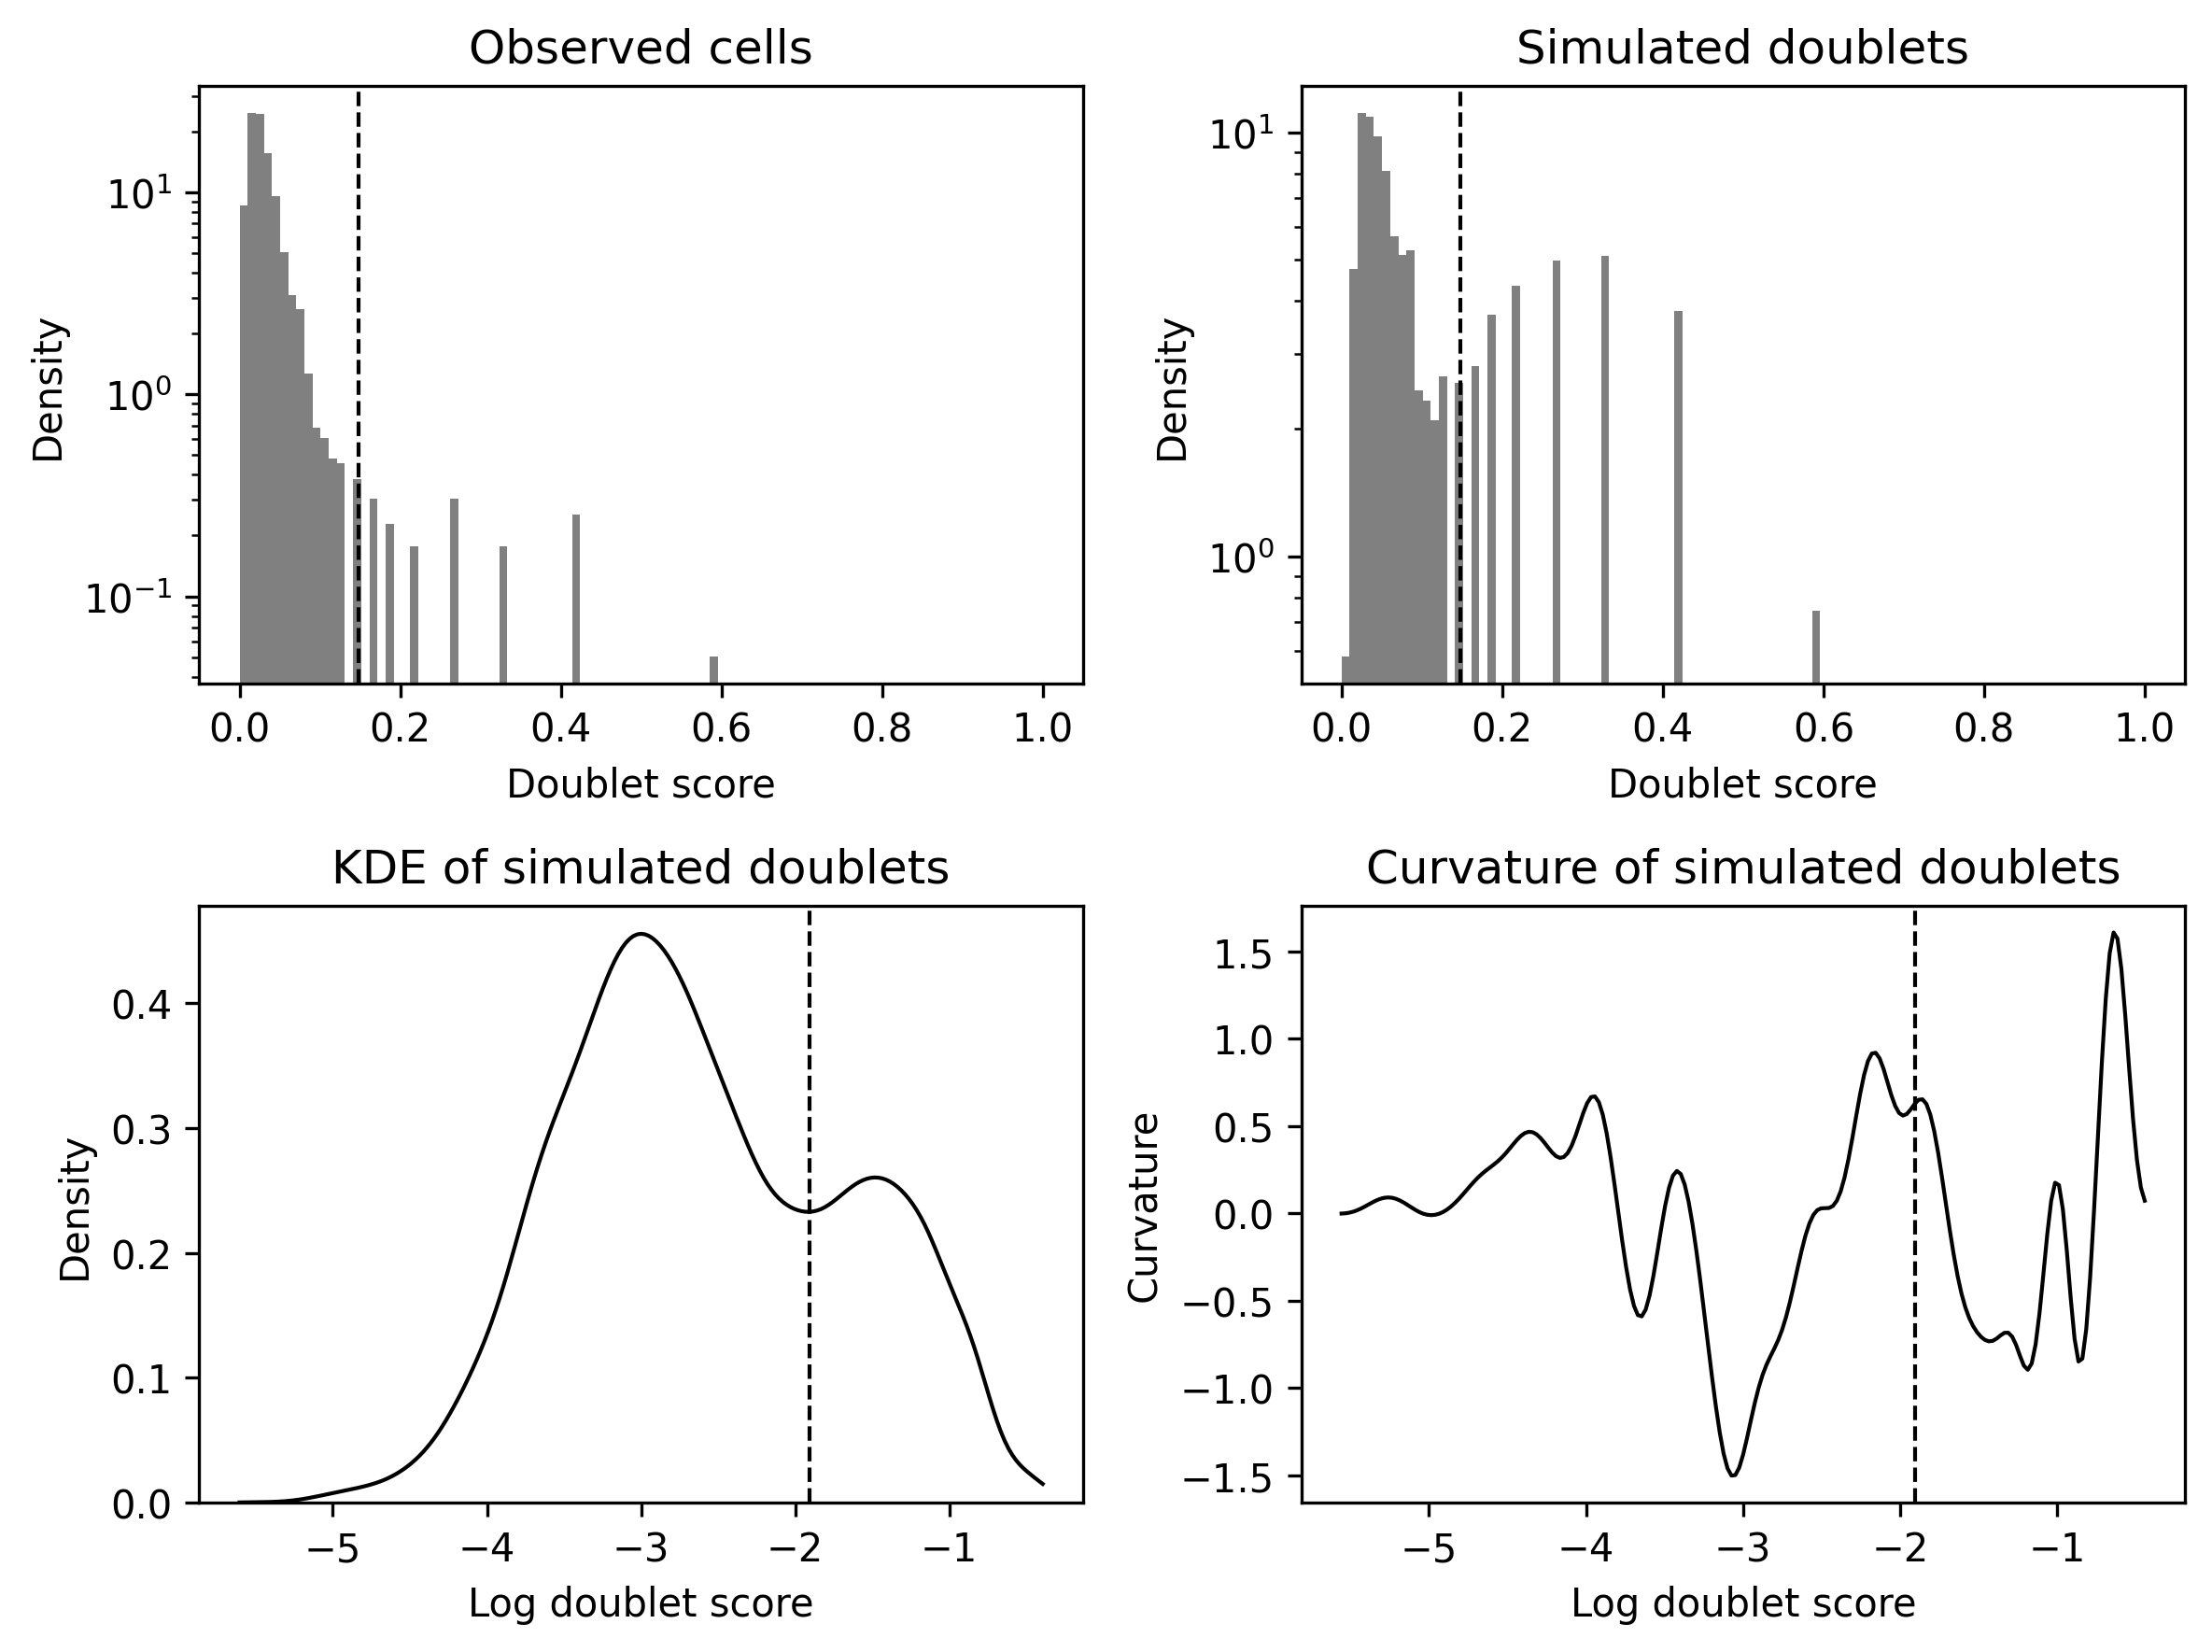

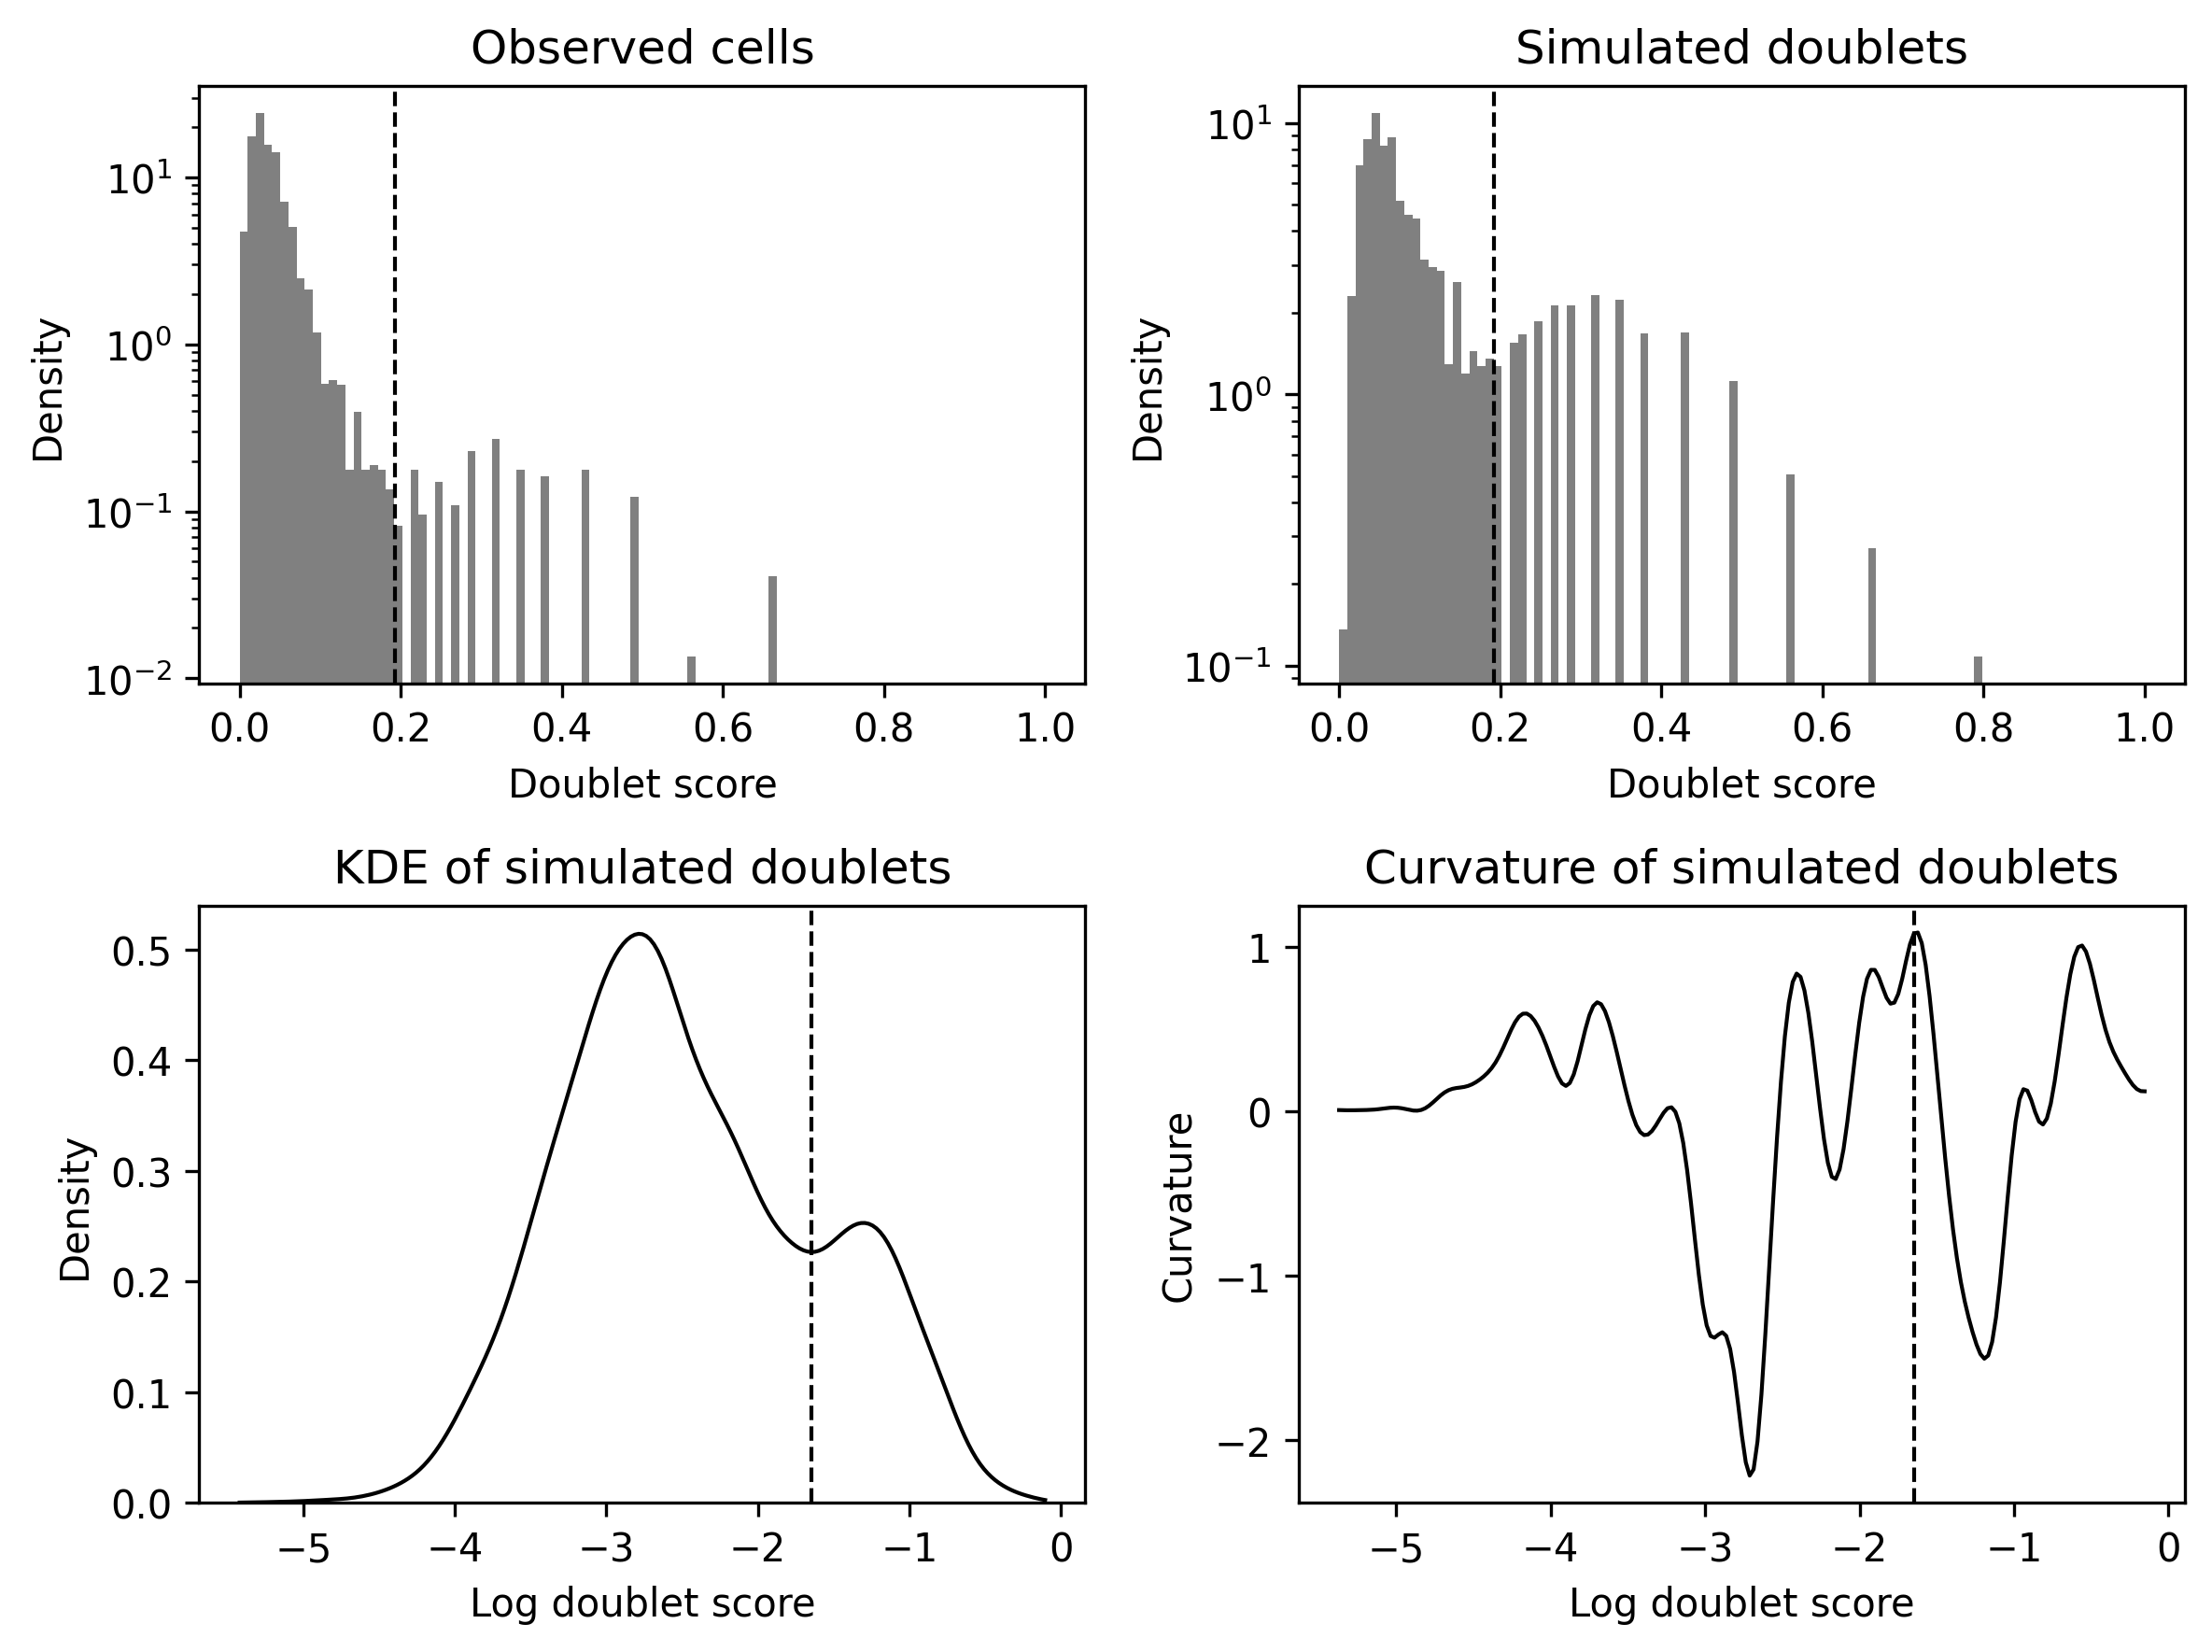

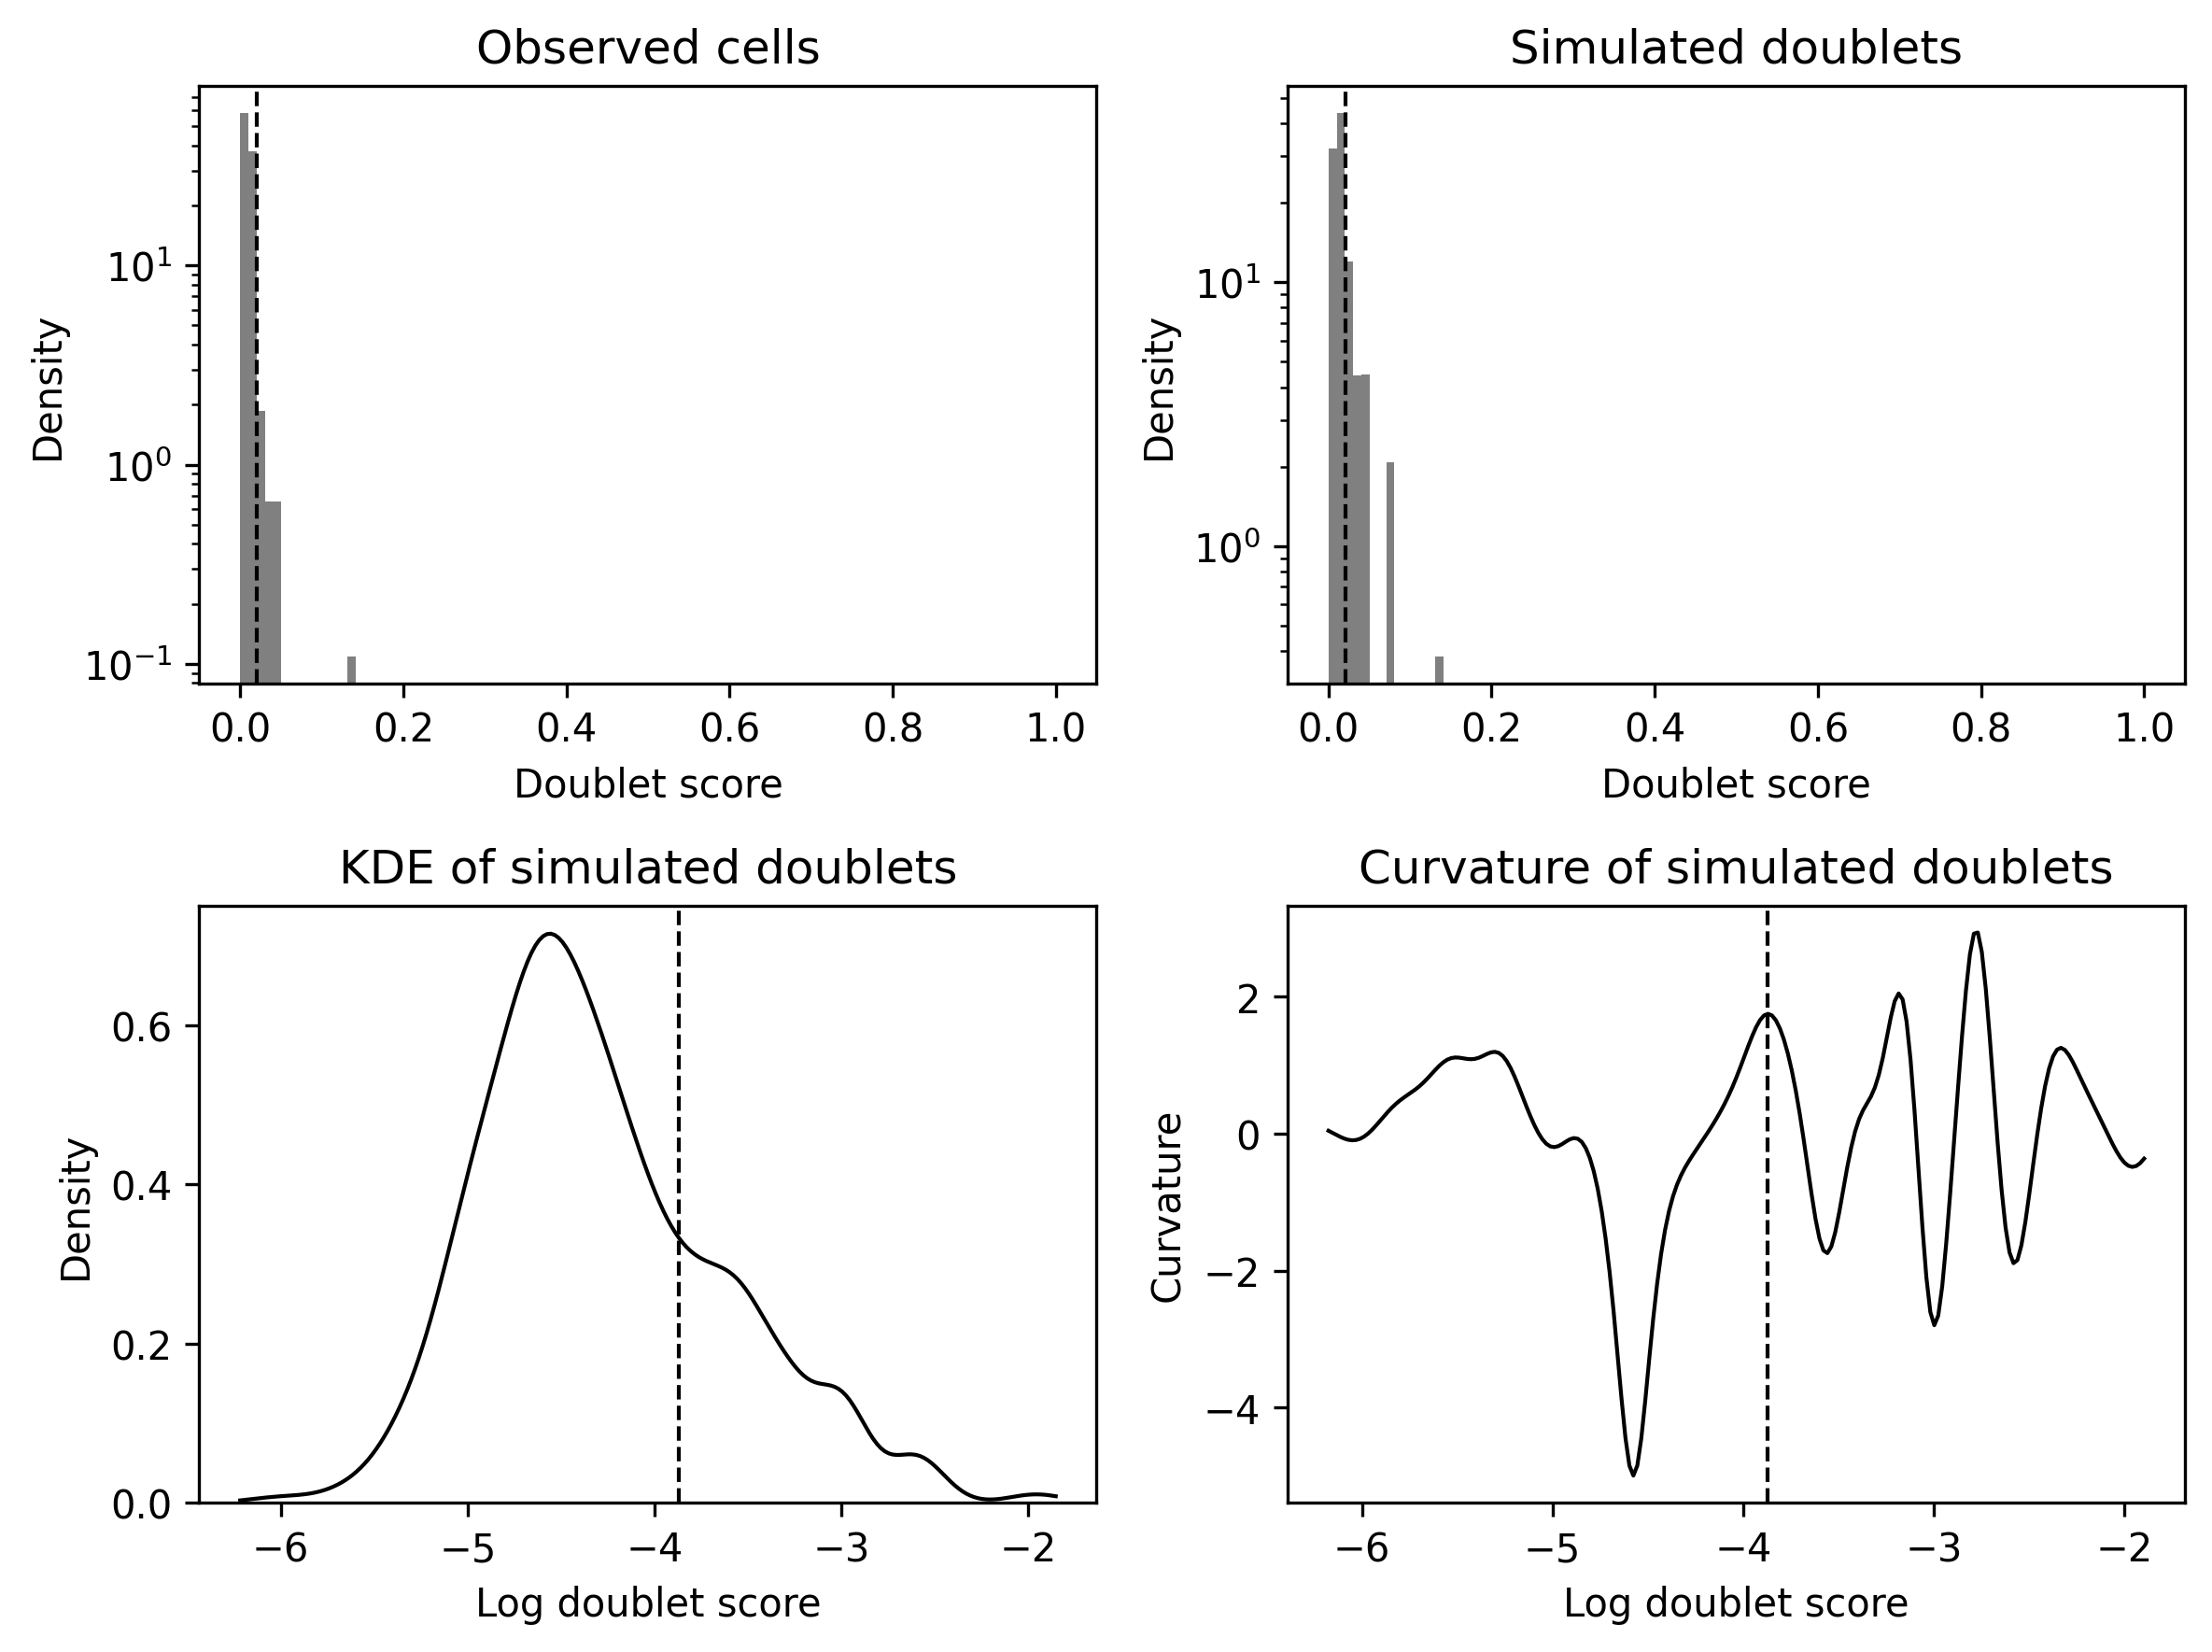

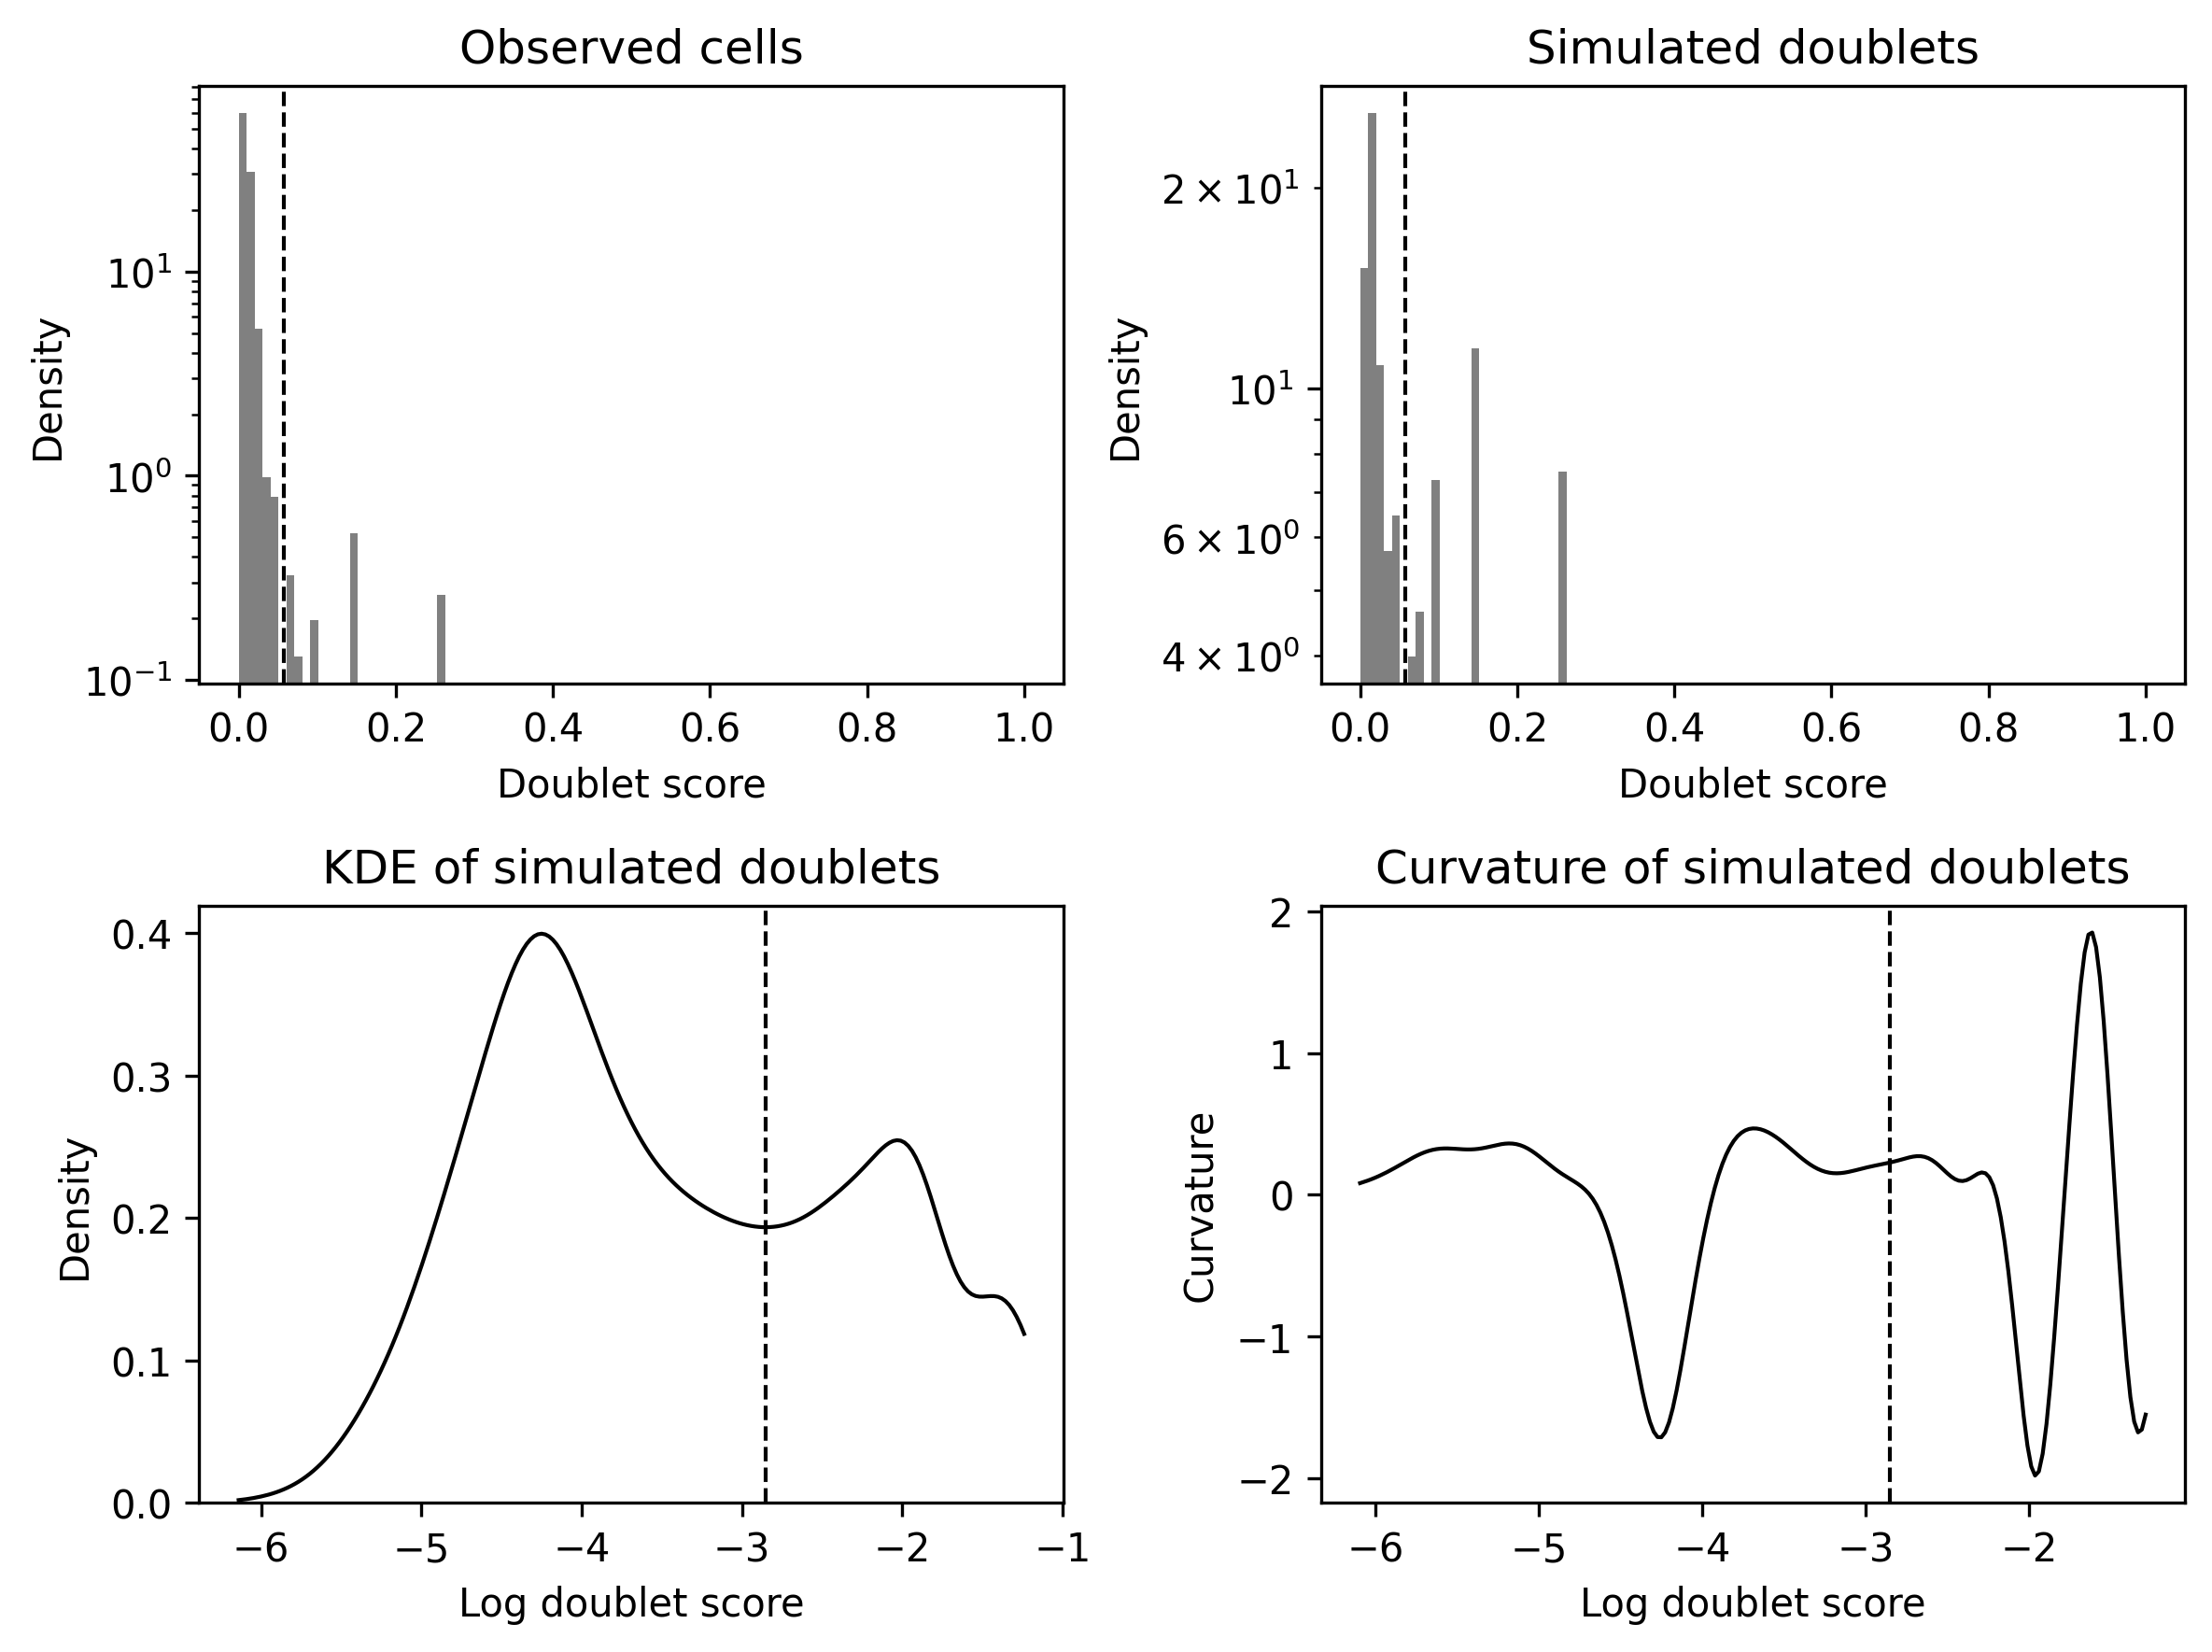

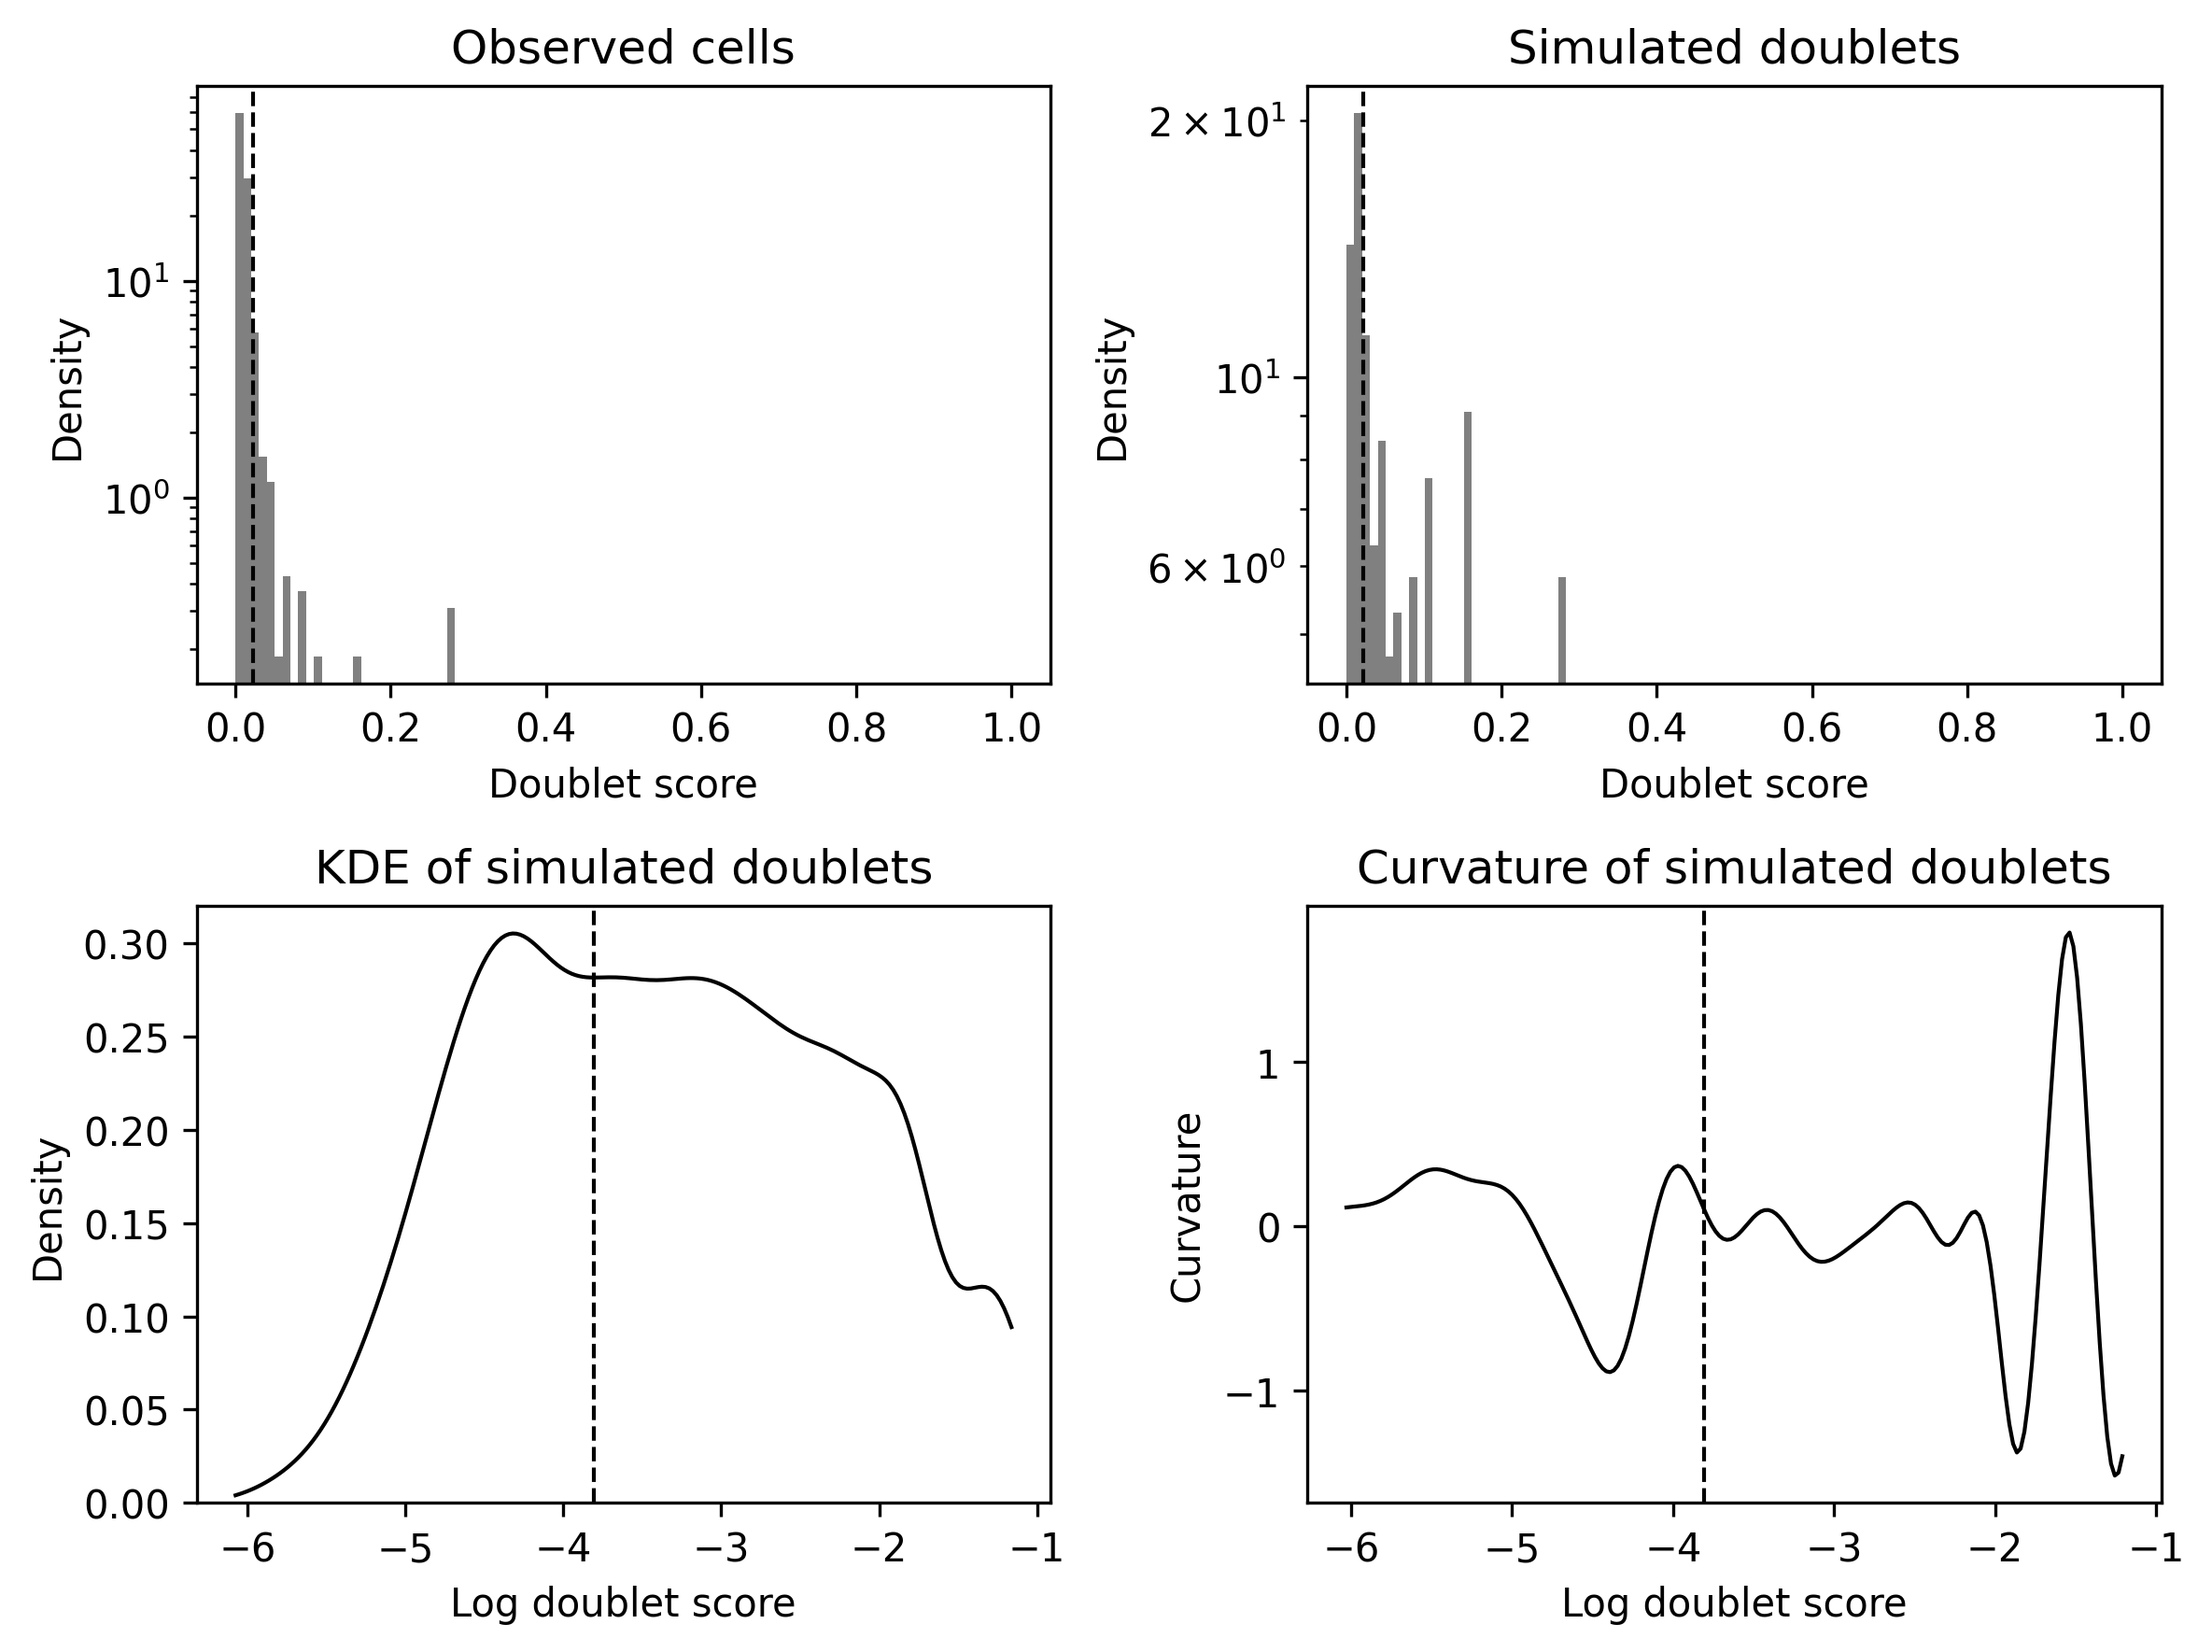

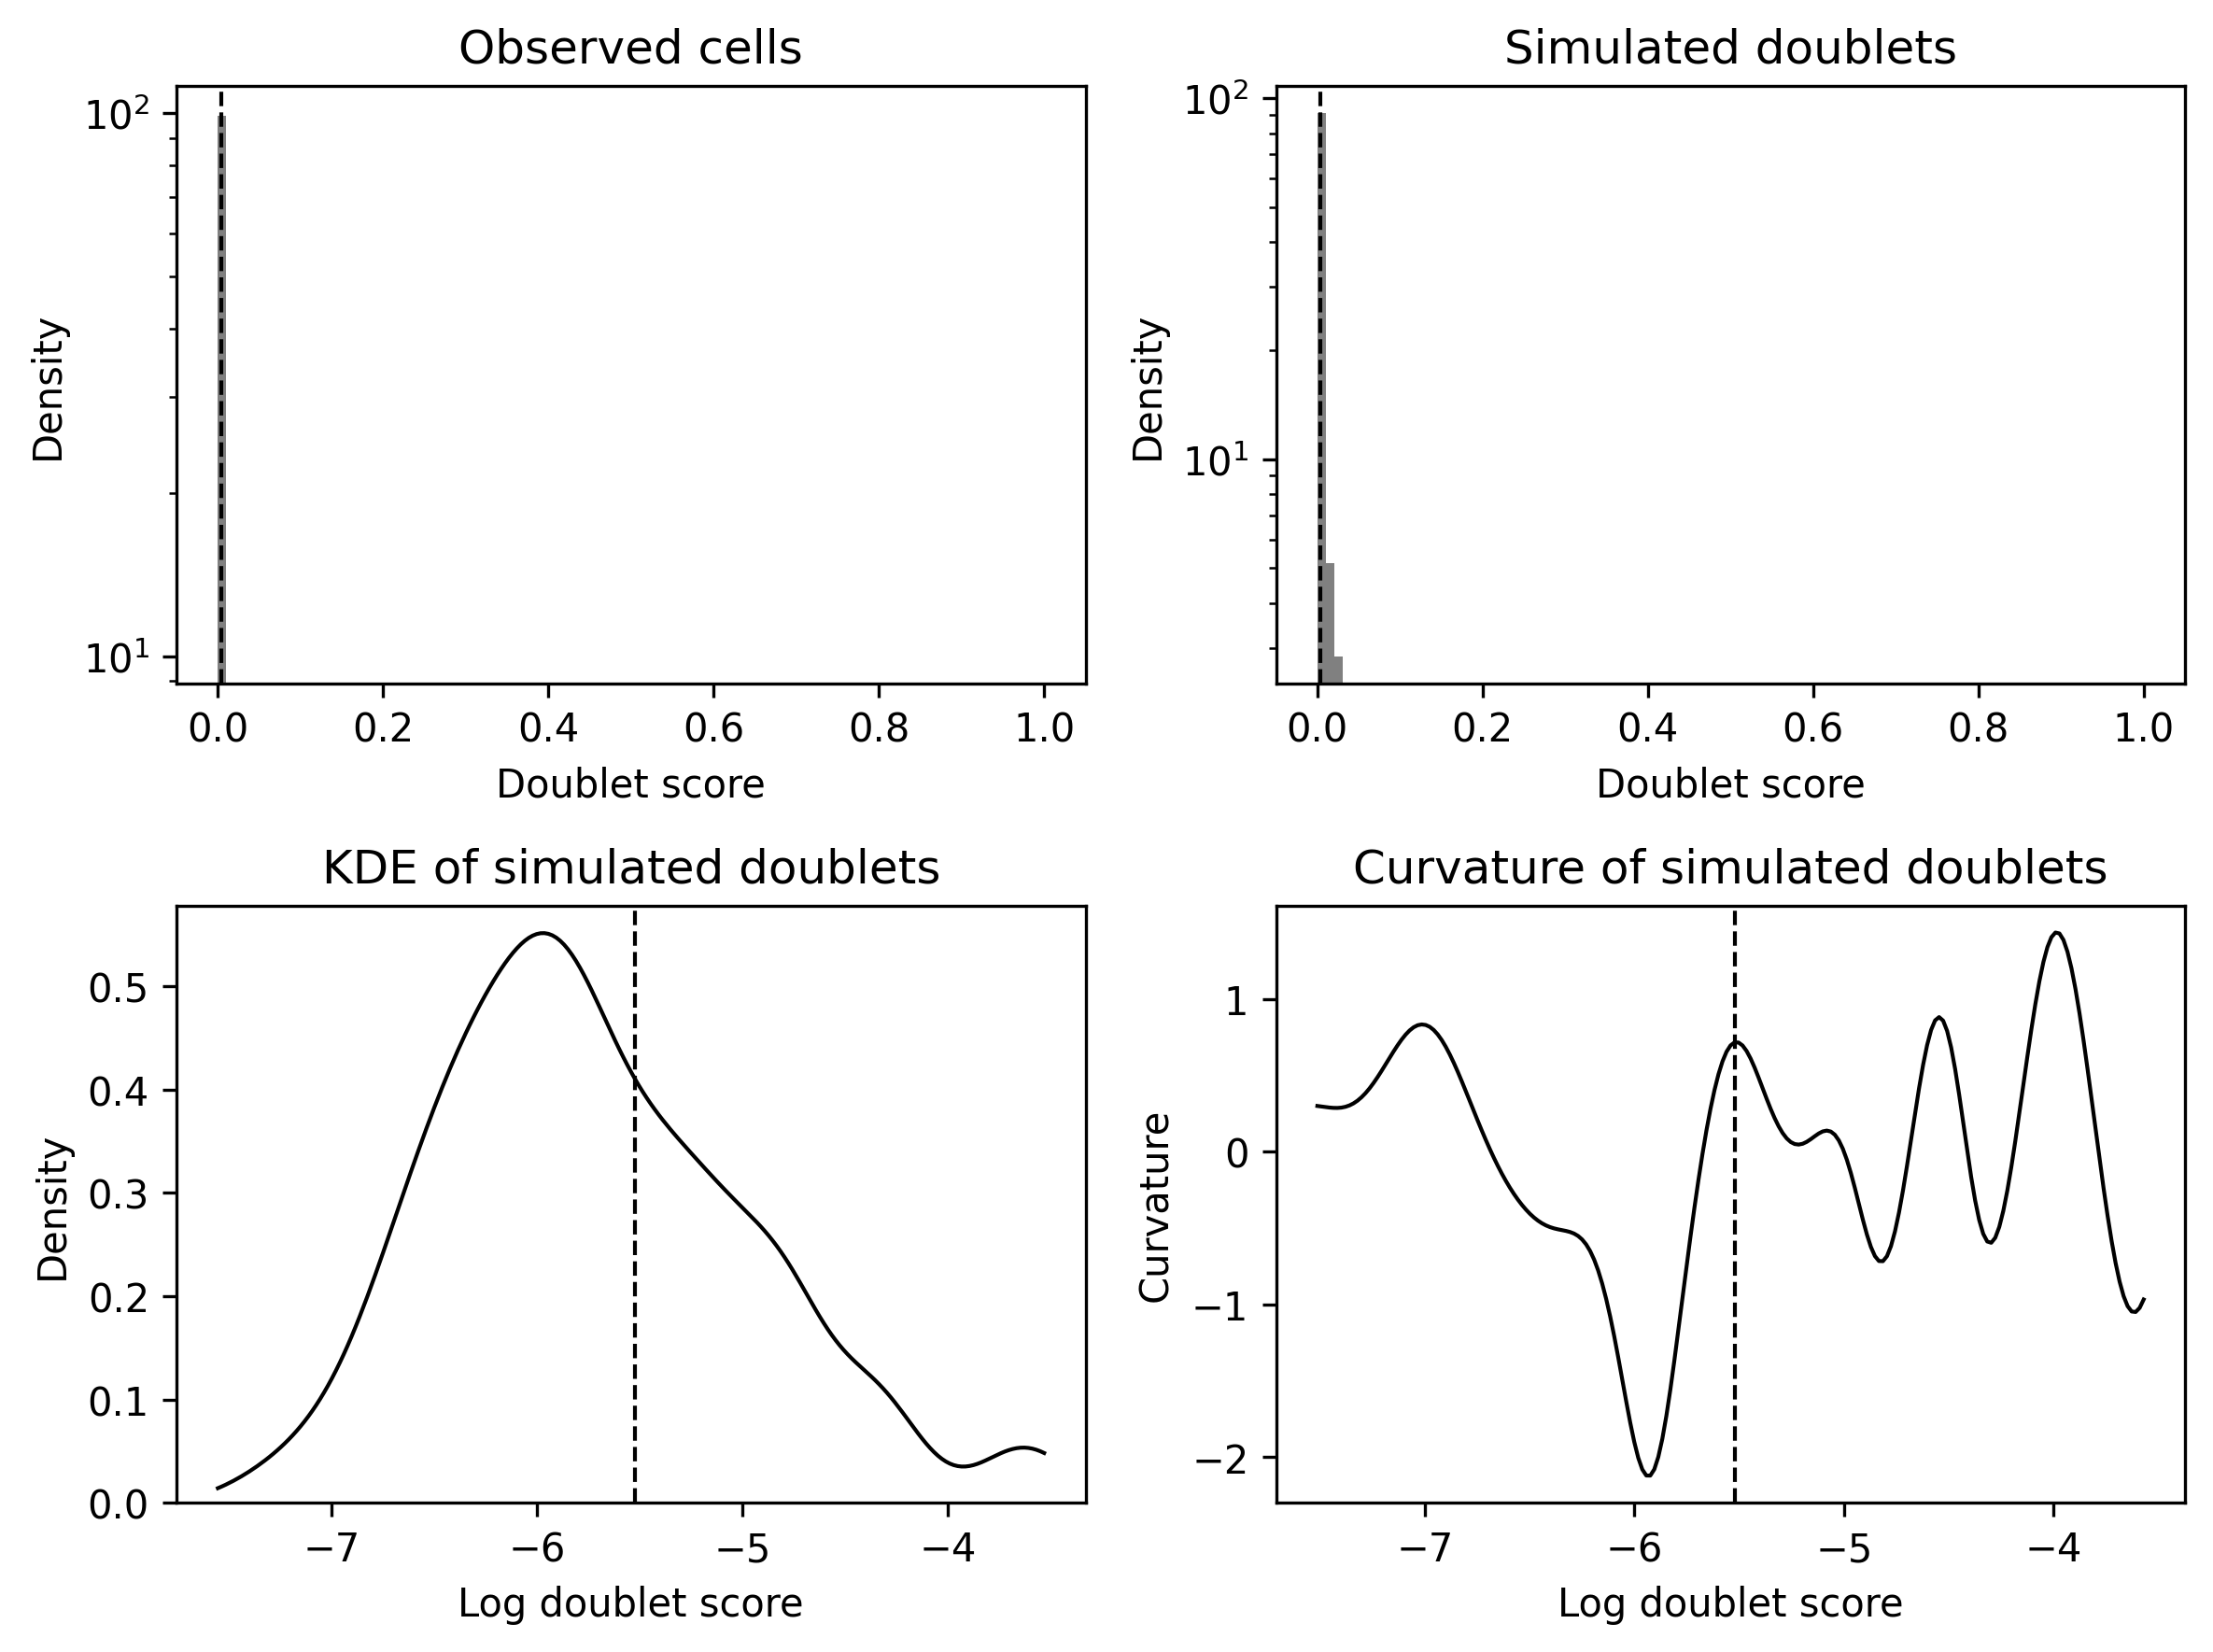

In [5]:
pg.infer_doublets(data, channel_attr = 'Channel', clust_attr = 'louvain_labels', robust = True)

In [6]:
data.uns['pred_dbl_cluster']

cluster  percentage      pval      qval
0      14    4.798464  0.009546  0.021818
1      11    4.761905  0.000173  0.000691
2       9    4.068047  0.004977  0.013272
3       4    3.932744  0.000026  0.000140
4       6    3.777336  0.000711  0.002275

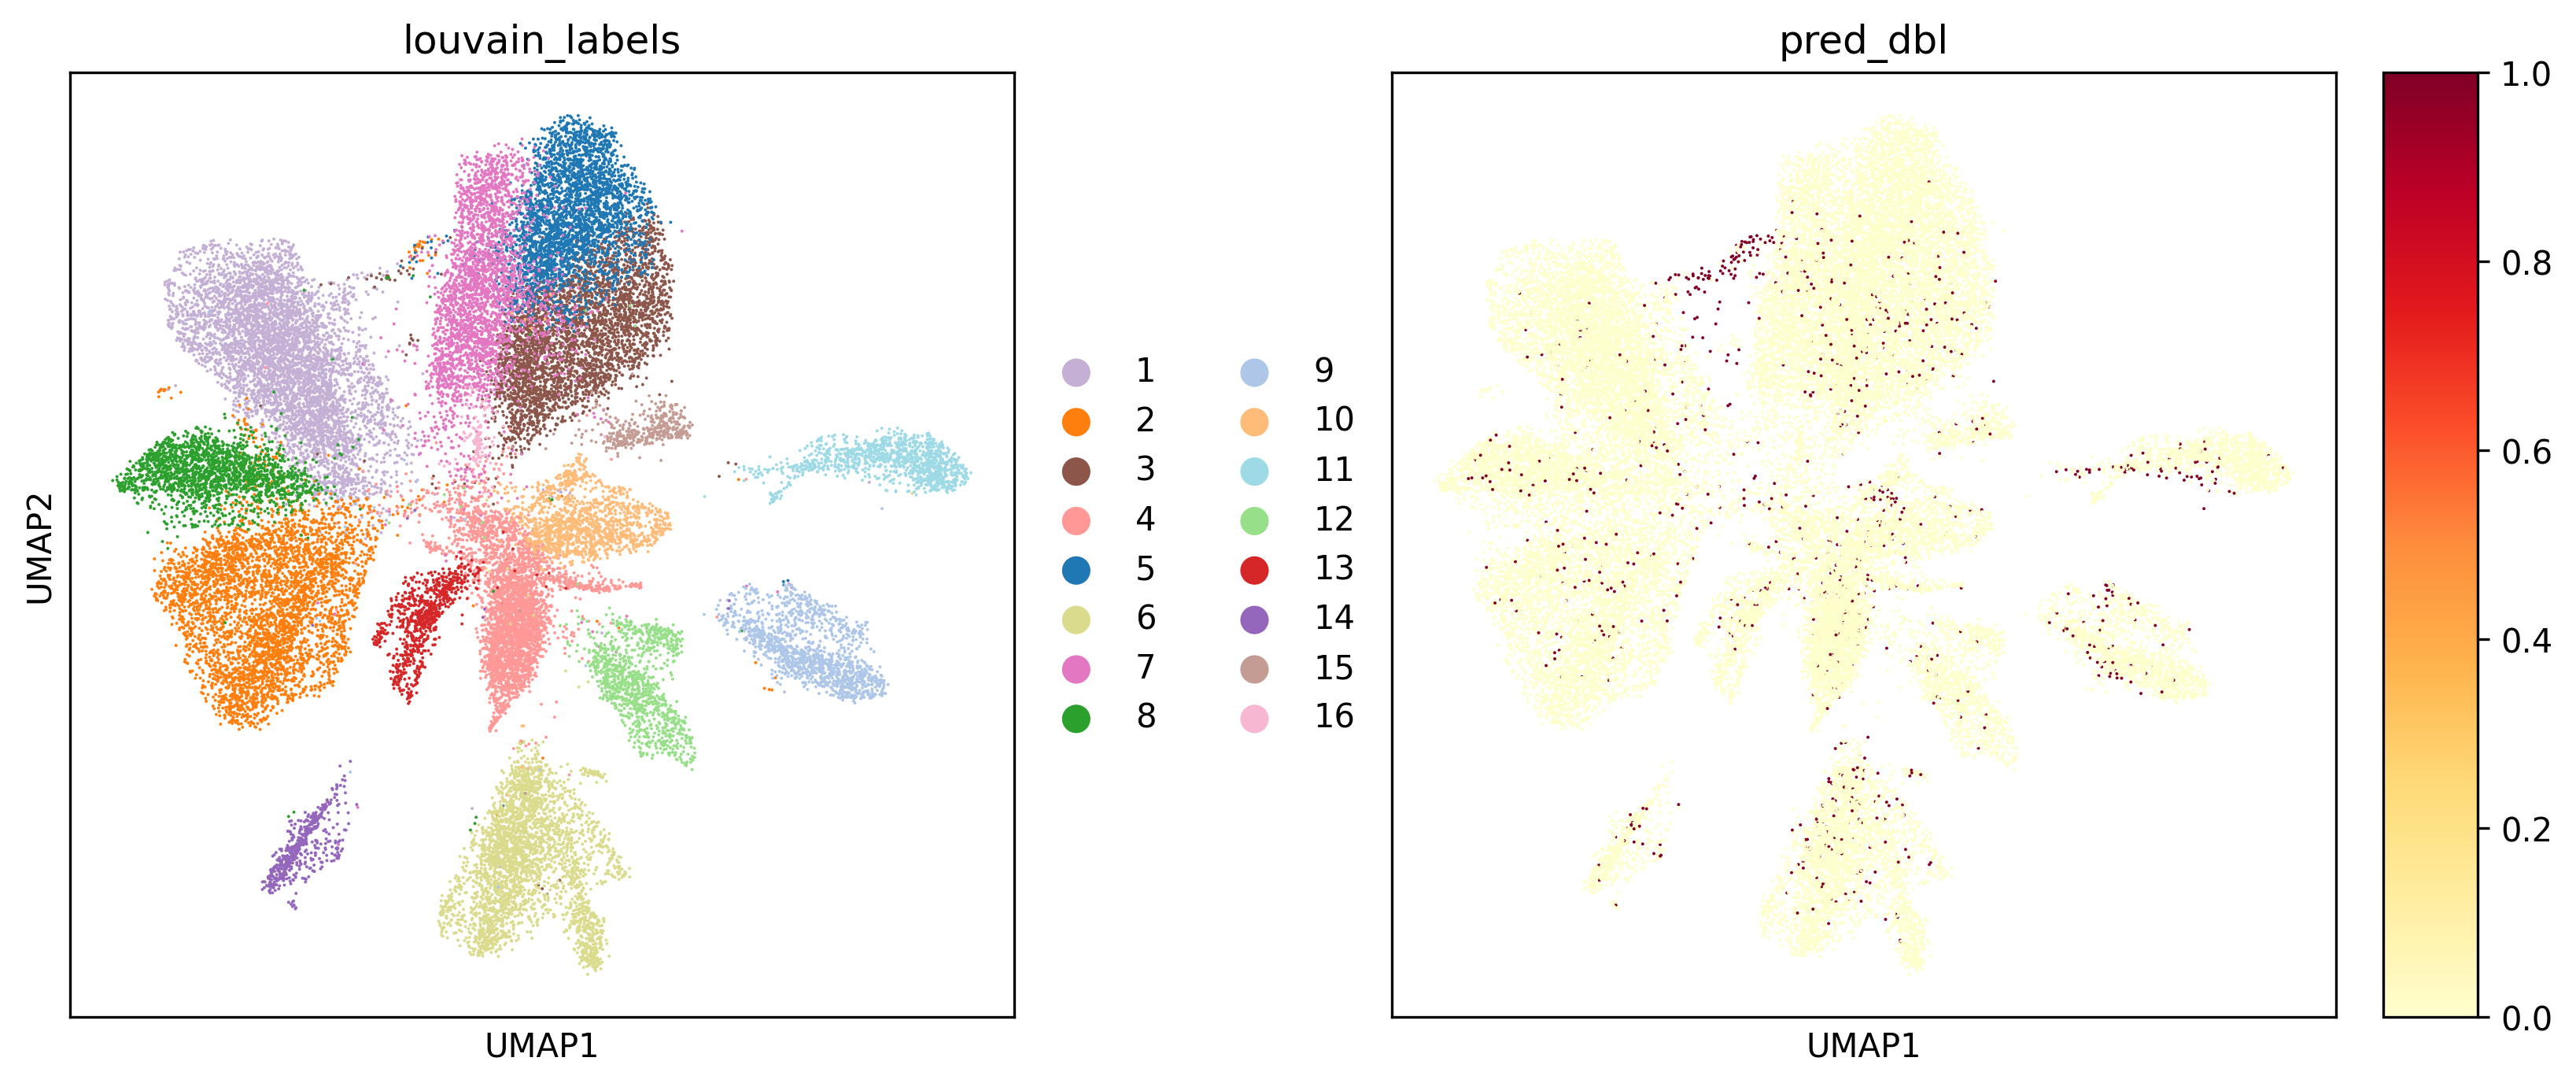

In [7]:
pg.scatter(data, attrs = ['louvain_labels', 'pred_dbl'])

In [8]:
data.obs['Channel'].value_counts(sort = False)

02-P240970-S036-R01    3987
02-P248880-S026-R01    3667
02-P334354-S027-R01     109
02-P348762-S026-R01    3071
04-P006354-S023-R01    3393
04-P054921-S064-R01       3
04-P079042-S047-R01       5
04-P103142-S049-R01      74
12-P485759-S016-R01    3904
12-P617758-S006-R01    3913
12-P890292-S006-R01    7294
13-P999991-S001-R01     906
13-P999992-S001-R01    1515
13-P999994-S001-R01    1598
13-P999996-S001-R01       7
13-P999997-S001-R01     278
Name: Channel, dtype: int64

In [17]:
pg.mark_doublets(data)

In [18]:
res = data.obs['demux_type'].value_counts()
print(res)
print(res['doublet']/res.sum())
print(res.sum())

singlet    32792
doublet      932
Name: demux_type, dtype: int64
0.027636104851144587
33724


In [19]:
idx = data.obs['demux_type'] == 'doublet'
with open('kidney_doublets.txt', 'w') as fout:
    fout.write('\n'.join(data.obs_names[idx]) + '\n')